<div style="display: flex; background-color: #3F579F;">
    <h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px;" align="center">Automatically classify consumer goods - P6</h1>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 5px 30px 0px 30px;" >
    <h3 style="width: 100%; text-align: center; float: left; font-size: 24px;" align="center">| Notebook |</h3>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 10px 30px 30px 30px;">
    <h4 style="width: 100%; text-align: center; float: left; font-size: 24px;" align="center">Data Scientist course - OpenClassrooms</h4>
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">1. Libraries and functions</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.1. Libraries and functions</h3>
</div>

In [1]:
## General
import ast
import operator
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

%matplotlib inline
sns.set_theme(style="darkgrid")

## Scikit Learn 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans

## Computer vision library
import cv2

## Own specific functions 
from functions_eda import *
from functions_nlp import *
from functions_img import *

## Images paths
ORIGINAL_IMAGES_PATH = "images/Flipkart/"
THUMBNAILS_IMAGES_PATH  = "images/Flipkart/thumbnails/"
CB_IMAGES_PATH = "images/Flipkart/thumbnails/contrast_and_brightness/" # path images with contrast and brightness edit
GRAY_IMAGES_PATH = CB_IMAGES_PATH + "gray_images/"
NR_IMAGES_PATH = GRAY_IMAGES_PATH + "noise_reduction/"

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Samir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Samir\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">2. Importing files and Initial analysis</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2.1. Importing and preparing files</h3>
</div>

<div class="alert alert-block alert-info">
    We are going to load the dateset resulting from the RFM
</div>

In [2]:
data = pd.read_csv(r"datasets\flipkart_com-ecommerce_sample_1050.csv")

In [3]:
data.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2.2. Initial analysis</h3>
</div>

In [4]:
df_analysis(data, "data", columns=["uniq_id"], analysis_type="complete")


Analysis Header of data dataset
--------------------------------------------------------------------------------
- Dataset shape:			 1050 rows and 15 columns
- Total of NaN values:			 341
- Percentage of NaN:			 2.17 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 116.0+ KB

- The key(s):	 ['uniq_id'] is not present multiple times in the dataframe. 
		 It CAN be used as a primary key.

Detailed analysis of data dataset
------------------------------------------------------------------------------------------------------------------------------------


name     type  records  unique  # NaN    % NaN  \
0                   uniq_id   object     1050    1050      0  0.00000   
1           crawl_timestamp   object     1050     149      0  0.00000   
2               product_url   object     1050    1050      0  0.00000   
3              product_name   object     1050    1050      0  0.00000   
4     product_category_tree   object     1050     642      0  0.00000   
5                       pid   object     1050    1050      0  0.00000   
8                     image   object     1050    1050      0  0.00000   
9   is_FK_Advantage_product     bool     1050       2      0  0.00000   
10              description   object     1050    1050      0  0.00000   
11           product_rating   object     1050      27      0  0.00000   
12           overall_rating   object     1050      27      0  0.00000   
6              retail_price  float64     1049     354      1  0.10000   
7          discounted_price  float64     1049     424      1  0.10000   
14   product_specifications   object     1049     984      1  0.10000   
13                    brand   object      712     490    338 32.19000   

         mean      min       25%       50%        75%          max        std  
0         NaN      NaN       NaN       NaN        NaN          NaN        NaN  
1         NaN      NaN       NaN       NaN        NaN          NaN        NaN  
2         NaN      NaN       NaN       NaN        NaN          NaN        NaN  
3         NaN      NaN       NaN       NaN        NaN          NaN        NaN  
4         NaN      NaN       NaN       NaN        NaN          NaN        NaN  
5         NaN      NaN       NaN       NaN        NaN          NaN        NaN  
8         NaN      NaN       NaN       NaN        NaN          NaN        NaN  
9         NaN      NaN       NaN       NaN        NaN          NaN        NaN  
10        NaN      NaN       NaN       NaN        NaN          NaN        NaN  
11        NaN      NaN       NaN       NaN        NaN          NaN        NaN  
12        NaN      NaN       NaN       NaN        NaN          NaN        NaN  
6  2186.19733 35.00000 555.00000 999.00000 1999.00000 201000.00000 7639.22941  
7  1584.52717 35.00000 340.00000 600.00000 1199.00000 201000.00000 7475.09968  
14        NaN      NaN       NaN       NaN        NaN          NaN        NaN  
13        NaN      NaN       NaN       NaN        NaN          NaN        NaN

<div class="alert alert-block alert-info">
    <p>Plotting the percentage of missing values by features</p>
</div>

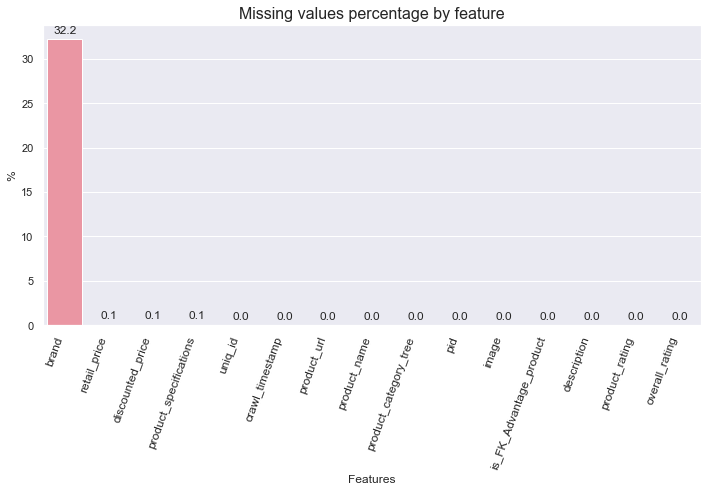

In [5]:
missing_values = data.isnull().sum(axis=0).sort_values(ascending=False)/len(data.index)*100

fig = plt.figure(figsize=(10, 7))
plot = sns.barplot(x=missing_values.index.tolist(), y=missing_values.values.tolist())
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=missing_values.index.tolist(), rotation=70, size=12, horizontalalignment="right")
plt.ylabel("%", size=12)
plt.xlabel("Features", size=12)
plt.title("Missing values percentage by feature", size=16)
plt.tight_layout()
plt.savefig("images/text_analysis/missing-values-percentage-by-feature.png")
plt.show()

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul>
        <li>There are some features that are not important to our text analysis. For example, pid, uniq_id, etc.</li>
        <li>The missing value percentage is higher only in one feature.</li>
    </ul>
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">3. Selecting the features to work</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.1. Analyzing the features</h3>
</div>

In [6]:
pd.set_option("display.max_rows", None) # show full of showing rows
pd.set_option("display.max_columns", None) # show full of showing cols
pd.set_option("display.max_colwidth", None) # show full width of showing cols
pd.set_option("display.float_format", lambda x: "%.5f" % x) # show full content in cell    

In [7]:
data.tail(1)

uniq_id            crawl_timestamp  \
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                                                                       product_url  \
1049  http://www.flipkart.com/uberlyfe-large-vinyl-sticker/p/itme2zepqqzr9jt5?pid=STIE2ZEPACRQJKH7   

                      product_name  \
1049  Uberlyfe Large Vinyl Sticker   

                                                    product_category_tree  \
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers"]   

                   pid  retail_price  discounted_price  \
1049  STIE2ZEPACRQJKH7    1190.00000         595.00000   

                                     image  is_FK_Advantage_product  \
1049  f2f027ad6a6df617c9f125173da71e44.jpg                    False   

                                                                                                                                                                                      description  \
1049  Buy Uberlyfe Large Vinyl Sticker for Rs.595 online. Uberlyfe Large Vinyl Sticker at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.   

     product_rating overall_rating     brand  \
1049              4              4  Uberlyfe   

                                                                                                                                                                                                                   product_specifications  
1049  {"product_specification"=>[{"key"=>"Sales Package", "value"=>"Sticker"}, {"key"=>"Brand", "value"=>"Uberlyfe"}, {"key"=>"Type", "value"=>"Vinyl"}, {"key"=>"Number of Stickers", "value"=>"1"}, {"key"=>"Size", "value"=>"Large"}]}

In [8]:
pd.reset_option("display.max_rows") # reset max of showing rows
pd.reset_option("display.max_columns") # reset max of showing cols
pd.reset_option("display.max_colwidth") # reset width of showing cols
pd.reset_option("display.float_format") # reset show full content in cell

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.1.1. Brand</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Let's analyze in detail the feature <b>brand</b></p>
</div>

In [9]:
data["brand"].unique()

array(['Elegance', 'Sathiyas', 'Eurospa', 'SANTOSH ROYAL FASHION',
       'Jaipur Print', nan, 'House This', 'Riva Carpets', 'Myesquire',
       'Dungri India Craft', 'BFT', 'JMD', 'Mom and Kid', "Kripa's",
       'Burt s Bees', 'AKUP', 'D-Link', 'Suave', 'RoQ', 'Cookart', 'JRB',
       'RYTHMX', 'Brillare Science', 'Mars', 'Aroma Care', 'KOHL',
       'Shopmania', 'CHHOTE JANAB', 'Prime', 'SKI', 'GAYATRI CREATIONS',
       'Caffeine', 'Garnet', 'Vitamins', 'KE', 'Giorgio Armani',
       'florence9', 'VarEesha', 'Treasure', 'CHINMAY KIDS', 'HEAVENLY',
       '@home', 'Smart Wall Guru', 'oxford', 'Eureka.in', 'Craft Trade',
       'Parv Collections', 'Exotic India', 'Aapno Rajasthan',
       'BeYOUtiful', 'My Angel', 'Diviniti', 'K&P', 'Rama',
       'Shop Rajasthan', 'Bestway', 'Artisan Creation', 'Remtex Export',
       'TWISHA', 'Eternity', 'FS Mini Klub', 'Omic', 'Filink', 'Recrafto',
       'FRENEMY', 'Quilt India', 'Toffyhouse', 'Shopizone', 'Craftcart',
       'SOS', 'Arsalan', '

<div class="alert alert-block alert-warning">
    <p>It seems that it does not add value to the problem. It contains the names of brands and probably it does not add value to classify images</p>
    <p>Despite that, we are going to keep it</p>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.1.2. Retail price</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Let's analyze in detail the feature <b>brand</b></p>
</div>

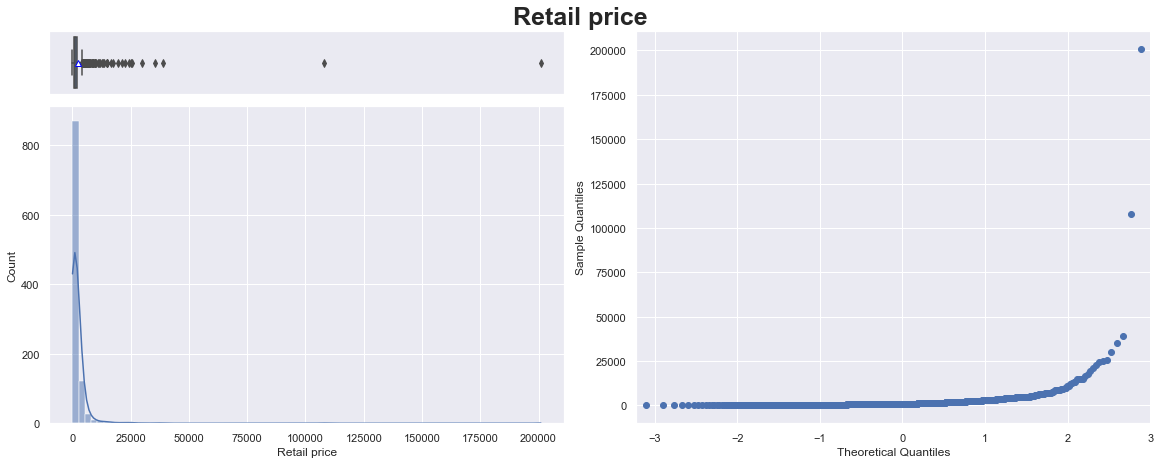

In [10]:
boxplot_histogram_qqplot(data["retail_price"], "Retail price")

<div class="alert alert-block alert-warning">
    <p><b>Observations / Conclusions</b></p>
    <p>Retail price doesn't have a normal distribution.</p>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.2. Selecting the features</h3>
</div>

<div class="alert alert-block alert-warning">
    <p>To select the features, first, we are going to <b>discard features</b> that do not add value to the problem</p>
    <ul style="list-style-type: square;">
        <li><b>crawl_timestamp</b></li>
        <li><b>product_url</b></li>
        <li><b>pid</b></li>
        <li><b>is_FK_Advantage_product</b></li>
        <li><b>product_rating</b></li>
        <li><b>overall_rating</b></li>
        <li><b>discounted_price</b></li>
    </ul> 
</div>

In [11]:
df_data = data.drop(columns=["crawl_timestamp", "product_url", "pid", "is_FK_Advantage_product",
                             "product_rating", "overall_rating", "discounted_price"],
                    axis=0).copy()

<div class="alert alert-block alert-info">
    <p>For now, we are going to keep the following features</p>
    <ul style="list-style-type: square;">
        <li><b>uniq_id</b> - we can use this feature to keep relations on the data</li>
        <li><b>product_name</b></li>
        <li><b>product_category_tree</b></li>
        <li><b>description</b></li>
        <li><b>retail_price</b></li>
        <li><b>brand</b></li>
        <li><b>product_specifications</b></li>        
    </ul> 
</div>

In [12]:
pd.set_option("display.max_rows", None) # show full of showing rows
pd.set_option("display.max_columns", None) # show full of showing cols
pd.set_option("display.max_colwidth", None) # show full width of showing cols
pd.set_option("display.float_format", lambda x: "%.5f" % x) # show full content in cell    

In [13]:
df_data.head(1)

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   

                                                 product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet Door Curtain   

                                                                                              product_category_tree  \
0  ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]   

   retail_price                                 image  \
0    1899.00000  55b85ea15a1536d46b7190ad6fff8ce7.jpg   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    description  \
0  Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester   

      brand  \
0  Elegance   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"}, 

In [14]:
pd.reset_option("display.max_rows") # reset max of showing rows
pd.reset_option("display.max_columns") # reset max of showing cols
pd.reset_option("display.max_colwidth") # reset width of showing cols
pd.reset_option("display.float_format") # reset show full content in cell

In [15]:
df_analysis(df_data, "df_data", type_analysis="complete")


Analysis Header of df_data dataset
--------------------------------------------------------------------------------
- Dataset shape:			 1050 rows and 8 columns
- Total of NaN values:			 340
- Percentage of NaN:			 4.05 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 65.8+ KB

Detailed analysis of df_data dataset
------------------------------------------------------------------------------------------------------------------------------------


name     type  records  unique  # NaN    % NaN  \
0                 uniq_id   object     1050    1050      0  0.00000   
1            product_name   object     1050    1050      0  0.00000   
2   product_category_tree   object     1050     642      0  0.00000   
4                   image   object     1050    1050      0  0.00000   
5             description   object     1050    1050      0  0.00000   
3            retail_price  float64     1049     354      1  0.10000   
7  product_specifications   object     1049     984      1  0.10000   
6                   brand   object      712     490    338 32.19000   

        mean      min       25%       50%        75%          max        std  
0        NaN      NaN       NaN       NaN        NaN          NaN        NaN  
1        NaN      NaN       NaN       NaN        NaN          NaN        NaN  
2        NaN      NaN       NaN       NaN        NaN          NaN        NaN  
4        NaN      NaN       NaN       NaN        NaN          NaN        NaN  
5        NaN      NaN       NaN       NaN        NaN          NaN        NaN  
3 2186.19733 35.00000 555.00000 999.00000 1999.00000 201000.00000 7639.22941  
7        NaN      NaN       NaN       NaN        NaN          NaN        NaN  
6        NaN      NaN       NaN       NaN        NaN          NaN        NaN


<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>Now, we have a dataset with the following characteristic</p>
    <ul style="list-style-type: square;">
        <li>30% missing-values in <b>brand</b></li>
        <li>One cell with missing-value in <b>retail_price</b></li>
    </ul> 
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">4. Treating missing-values</h2>
</div>

<div class="alert alert-block alert-info">
    <p><b>To treat missing-values</b>, we are going to do as follows</p>
    <ol>
        <li>Fill missing-vallues in <b>brand</b> and <b>product_specifications</b> with empty-value.</li>
        <li>Fill missing-vallues in <b>retail_price</b> based on the median for the same <b>product category</b>.</li>
    </ol>
</div>
<div class="alert alert-block alert-info">
    <p>So, Being the feature called <b>brand</b> only one missing-value, let's proceed to complete it with empty-value</p>
</div>

In [16]:
df_data["brand"].fillna("", inplace=True)
df_data["product_specifications"].fillna("", inplace=True)

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">4.1. Analyzing "product_category_tree"</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's analyse the levels of the tree in <b>product_category_tree</b></p>
</div>

In [17]:
for i in [0, 10, 100, 1049]:
    print(df_data.loc[i, "product_category_tree"])

["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]
["Watches >> Wrist Watches >> Calibro Wrist Watches"]
["Beauty and Personal Care >> Makeup >> Vanity Boxes >> Goldencollections Vanity Boxes"]
["Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers"]


<div class="alert alert-block alert-warning">
    <p><b>Observations / Conclusions</b></p>
    <p>The levels in the tree does not seem equals in all records</p>
</div>

In [18]:
df_data["tree_levels"] = df_data["product_category_tree"].str.count(">>")

In [19]:
df_data["tree_levels"].max()

6

In [20]:
pd.set_option("display.max_rows", None) # show full of showing rows
pd.set_option("display.max_columns", None) # show full of showing cols
pd.set_option("display.max_colwidth", None) # show full width of showing cols
pd.set_option("display.float_format", lambda x: "%.5f" % x) # show full content in cell    

In [21]:
df_data.query("tree_levels == tree_levels.min()").head(1)

uniq_id product_name  \
250  17611e6e94d73ef376834e5c6ee03dde    TRUE Bong   

                                                 product_category_tree  \
250  ["Home Decor & Festive Needs >> TRUE Home Decor & Festive Needs"]   

     retail_price                                 image  \
250     999.00000  17611e6e94d73ef376834e5c6ee03dde.jpg   

                                                                                                                                               description  \
250  Buy TRUE Bong for Rs.549 online. TRUE Bong at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.   

    brand  \
250  TRUE   

                                                                                                                                                                                                                                                                                                                                                                                     product_specifications  \
250  {"product_specification"=>[{"key"=>"Brand", "value"=>"TRUE"}, {"key"=>"Model Number", "value"=>"SN. 109"}, {"key"=>"Model Name", "value"=>"Acrylic Rasta -16 Inch"}, {"key"=>"Material", "value"=>"Plastic"}, {"key"=>"Function Type", "value"=>"Ice"}, {"key"=>"Color", "value"=>"Multicolor"}, {"value"=>"1 Bong"}, {"key"=>"Joint Size", "value"=>"14.5 mm"}, {"key"=>"Height", "value"=>"40 cm"}]}   

     tree_levels  
250            1

In [22]:
df_data.query("tree_levels == tree_levels.max()").head(1)

uniq_id  \
40  90e56526f4c5892beac49f262b85150a   

                                              product_name  \
40  Mom and Kid Baby Girl's Printed Green Top & Pyjama Set   

                                                                                                                                                            product_category_tree  \
40  ["Baby Care >> Infant Wear >> Baby Girls' Clothes >> Innerwear & Sleepwear >> Night Suits >> Mom and Kid Night Suits >> Mom and Kid Baby Girl's Printed Green Top & Pyja..."]   

    retail_price                                 image  \
40     999.00000  90e56526f4c5892beac49f262b85150a.jpg   

                                                                                                                                                                                                                                                                                                                                                                                                                            description  \
40  Key Features of Mom and Kid Baby Girl's Printed Green Top & Pyjama Set Fabric: Cotton Brand Color: Green,Mom and Kid Baby Girl's Printed Green Top & Pyjama Set Price: Rs. 309 Girls Pyjama set,Specifications of Mom and Kid Baby Girl's Printed Green Top & Pyjama Set General Details Pattern Printed Ideal For Baby Girl's Night Suit Details Fabric Cotton Type Top & Pyjama Set Neck Round Neck In the Box 1 Top & Pyjama Set   

          brand  \
40  Mom and Kid   

                                                                                                                                                                                                                                                                product_specifications  \
40  {"product_specification"=>[{"key"=>"Pattern", "value"=>"Printed"}, {"key"=>"Ideal For", "value"=>"Baby Girl's"}, {"key"=>"Fabric", "value"=>"Cotton"}, {"key"=>"Type", "value"=>"Top and Pyjama Set"}, {"key"=>"Neck", "value"=>"Round Neck"}, {"value"=>"1 Top and Pyjama Set"}]}   

    tree_levels  
40            6

In [23]:
pd.reset_option("display.max_rows") # reset max of showing rows
pd.reset_option("display.max_columns") # reset max of showing cols
pd.reset_option("display.max_colwidth") # reset width of showing cols
pd.reset_option("display.float_format") # reset show full content in cell

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>There are from 2 until 6 levels in <b>product_category_tree</b></p>
</div>

<div class="alert alert-block alert-info">
    <p>Let's analyze the 2 first levels that are common in all records</p>
</div>

In [24]:
df_data["category_1"] = df_data["product_category_tree"].apply(lambda x :x.split('>>')[0][2:len(x.split(">>")[0])])
df_data["category_1"] = df_data["category_1"].apply(lambda x :x.strip())

df_data["category_2"] = df_data["product_category_tree"].apply(lambda x :x.split('>>')[1])
df_data["category_2"] = df_data["category_2"].apply(lambda x :x.strip())

In [25]:
df_data.head()

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   
1  7b72c92c2f6c40268628ec5f14c6d590   
2  64d5d4a258243731dc7bbb1eef49ad74   
3  d4684dcdc759dd9cdf41504698d737d8   
4  6325b6870c54cd47be6ebfbffa620ec7   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree  retail_price  \
0  ["Home Furnishing >> Curtains & Accessories >>...        1899.0   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...         600.0   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...           NaN   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...        2699.0   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...        2599.0   

                                  image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3  d4684dcdc759dd9cdf41504698d737d8.jpg   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                                         description                  brand  \
0  Key Features of Elegance Polyester Multicolor ...               Elegance   
1  Specifications of Sathiyas Cotton Bath Towel (...               Sathiyas   
2  Key Features of Eurospa Cotton Terry Face Towe...                Eurospa   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...  SANTOSH ROYAL FASHION   
4  Key Features of Jaipur Print Cotton Floral Kin...           Jaipur Print   

                              product_specifications  tree_levels  \
0  {"product_specification"=>[{"key"=>"Brand", "v...            3   
1  {"product_specification"=>[{"key"=>"Machine Wa...            4   
2  {"product_specification"=>[{"key"=>"Material",...            4   
3  {"product_specification"=>[{"key"=>"Brand", "v...            4   
4  {"product_specification"=>[{"key"=>"Machine Wa...            4   

        category_1              category_2  
0  Home Furnishing  Curtains & Accessories  
1        Baby Care        Baby Bath & Skin  
2        Baby Care        Baby Bath & Skin  
3  Home Furnishing               Bed Linen  
4  Home Furnishing               Bed Linen

In [26]:
print("Unique categories in level 1:", df_data["category_1"].nunique())
print("Unique categories in level 2:", df_data["category_2"].nunique())

Unique categories in level 1: 7
Unique categories in level 2: 63


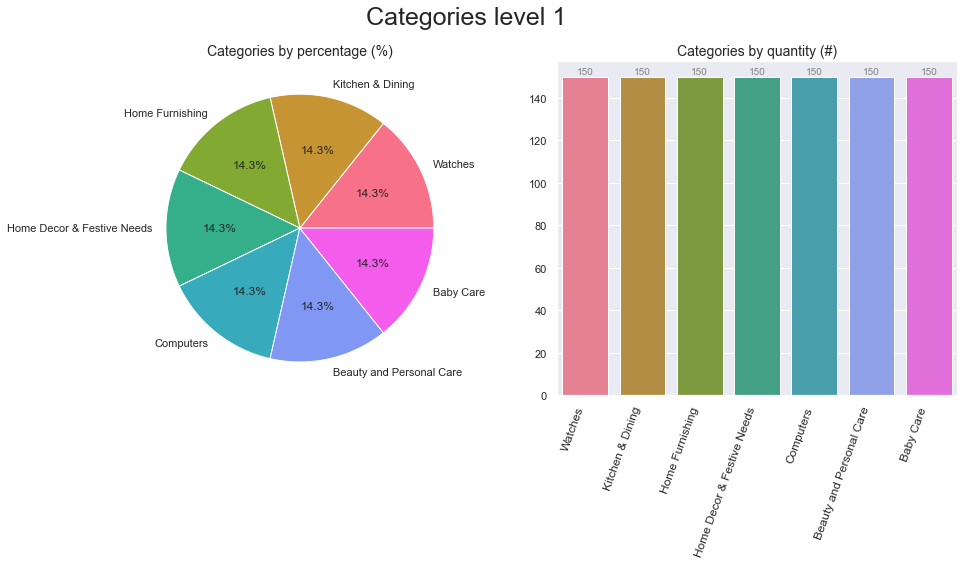

In [27]:
barplot_and_pie(df_data["category_1"], "Categories level 1", "Categories")

<div class="alert alert-block alert-warning">
    <p><b>Observations / Conclusions</b></p>
    <p>Based on the plot, we can ask whether we will get 7 clusters in our modeling? </p>
</div>

<div class="alert alert-block alert-info">
    <p>Let's see the record with <b>retail_price</b> missing-value</p>
</div>

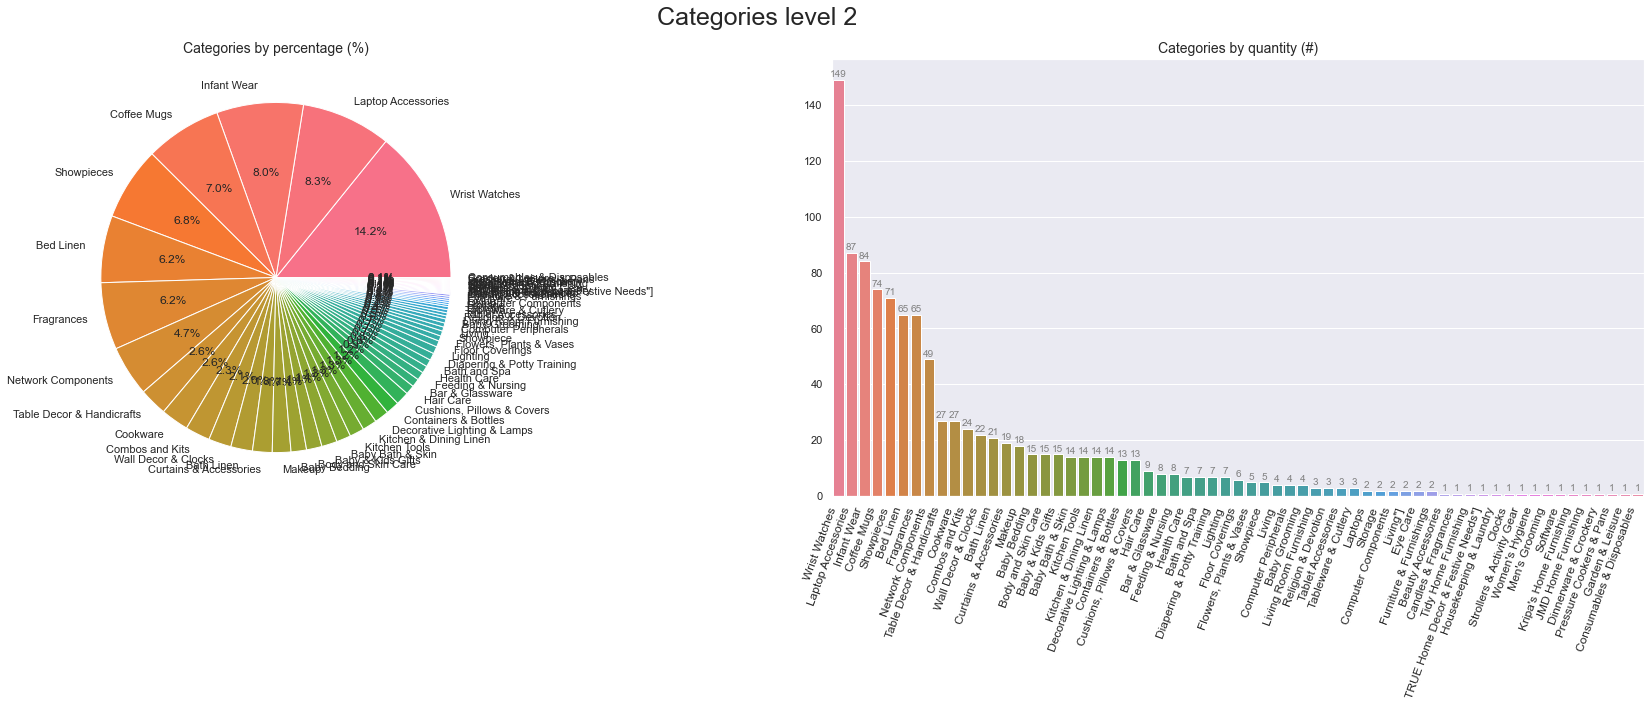

In [28]:
barplot_and_pie(df_data["category_2"], "Categories level 2", "Categories")

In [29]:
df_data[df_data["retail_price"].isna()]

uniq_id                         product_name  \
2  64d5d4a258243731dc7bbb1eef49ad74  Eurospa Cotton Terry Face Towel Set   

                               product_category_tree  retail_price  \
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...           NaN   

                                  image  \
2  64d5d4a258243731dc7bbb1eef49ad74.jpg   

                                         description    brand  \
2  Key Features of Eurospa Cotton Terry Face Towe...  Eurospa   

                              product_specifications  tree_levels category_1  \
2  {"product_specification"=>[{"key"=>"Material",...            4  Baby Care   

         category_2  
2  Baby Bath & Skin

<div class="alert alert-block alert-success">
    <p>Let's get to the mean of the <b>retail_price</b> based on the firsts two categories in the tree</p>
</div>

In [30]:
retail_price_mean = df_data[(df_data["category_1"]=="Baby Care") & (df_data["category_2"]=="Baby Bath & Skin")]["retail_price"].mean()
retail_price_mean

1200.1538461538462

<div class="alert alert-block alert-info">
    <p>Let's replace the missing-value into <b>retail_price</b></p>
</div>

In [31]:
df_data["retail_price"].fillna(retail_price_mean, inplace=True)

<div class="alert alert-block alert-info">
    <p>Let's proceed to delete the categories features added</p>
</div>

In [32]:
df_data.drop(columns=["tree_levels", "category_2"], axis=1, inplace=True)

<div class="alert alert-block alert-info">
    <p>Let's analyze the dataset</p>
</div>

In [33]:
df_analysis(df_data, "df_data", type_analysis="complete")


Analysis Header of df_data dataset
--------------------------------------------------------------------------------
- Dataset shape:			 1050 rows and 9 columns
- Total of NaN values:			 0
- Percentage of NaN:			 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 74.0+ KB

Detailed analysis of df_data dataset
------------------------------------------------------------------------------------------------------------------------------------


name     type  records  unique  # NaN   % NaN       mean  \
0                 uniq_id   object     1050    1050      0 0.00000        NaN   
1            product_name   object     1050    1050      0 0.00000        NaN   
2   product_category_tree   object     1050     642      0 0.00000        NaN   
3            retail_price  float64     1050     355      0 0.00000 2185.25824   
4                   image   object     1050    1050      0 0.00000        NaN   
5             description   object     1050    1050      0 0.00000        NaN   
6                   brand   object     1050     491      0 0.00000        NaN   
7  product_specifications   object     1050     985      0 0.00000        NaN   
8              category_1   object     1050       7      0 0.00000        NaN   

       min       25%       50%        75%          max        std  
0      NaN       NaN       NaN        NaN          NaN        NaN  
1      NaN       NaN       NaN        NaN          NaN        NaN  
2      NaN       NaN       NaN        NaN          NaN        NaN  
3 35.00000 555.75000 999.00000 1999.00000 201000.00000 7635.64798  
4      NaN       NaN       NaN        NaN          NaN        NaN  
5      NaN       NaN       NaN        NaN          NaN        NaN  
6      NaN       NaN       NaN        NaN          NaN        NaN  
7      NaN       NaN       NaN        NaN          NaN        NaN  
8      NaN       NaN       NaN        NaN          NaN        NaN

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>At this point, we have the dataset without missing-values.</p>
    <p>Let's proced to make the normalization.</p>
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">5. Pre-processing Text data</h2>
</div>

<div class="alert alert-block alert-info">
    <p>We are going to process the following features</p>
    <ol>
        <li>product_name</li>
        <li>product_category_tree</li>
        <li>description</li>
        <li>brand</li>
    </ol>
</div>

In [34]:
text_columns = [
    "product_name", "product_category_tree",
    "description", "brand", "product_specifications"
]

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">5.1. Analyzing the characters in the features</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Before doing the steps above, let's check what type of character we have in the dataset.<br>Then we can use the appropriate tokenizer</p>
</div>

In [35]:
character_type = ["numerical", "special"]

for col in text_columns:
    
    # checking the character in each sample by feature
    df_data[col + "_check"] = df_data[col].apply(lambda x: check_characters(x))
    
    # Normalizing to column, the dict in the sample
    globals()["df_" + col + "_check"] = pd.json_normalize(df_data[col + "_check"])
    
    # Counting the characters uniques by feature
    for val in character_type:
        globals()["dict_" + col + "_" + val] = {}

        for i in globals()["df_" + col + "_check"][val]:
            for j in i:
                if j not in globals()["dict_" + col + "_" + val]:
                    globals()["dict_" + col + "_" + val][j] = 1
                else:
                    globals()["dict_" + col + "_" + val][j] += 1
                    
        # Sorting dict by value descending
        globals()["dict_" + col + "_" + val] = sorted(globals()["dict_" + col + "_" + val].items(),
                                                      key=operator.itemgetter(1), reverse=True)
        globals()["dict_" + col + "_" + val] = {k:v for k, v in globals()["dict_" + col + "_" + val]}
        
        # Creating dataset based on the dict
        if val == "special":
            globals()["df_" + col + "_" + val] = pd.DataFrame({"character" : list(globals()["dict_" + col + "_" + val].keys()),
                                                              "number" : list(globals()["dict_" + col + "_" + val].values())})

<div class="alert alert-block alert-info">
    <p>Plotting the special characters in <b>description</b></p>
</div>

C:\Users\Samir\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Samir\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


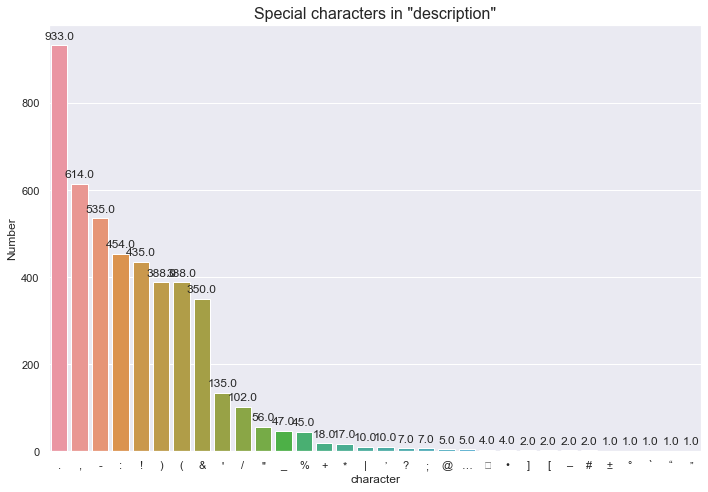

In [36]:
fig = plt.figure(figsize=(10, 7))
plot = sns.barplot(x=df_description_special["character"], y=df_description_special["number"])
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plt.ylabel("Number", size=12)
plt.xlabel("character", size=12)
plt.title("Special characters in \"description\"", size=16)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the special characters in <b>product_category_tree</b></p>
</div>

C:\Users\Samir\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Samir\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


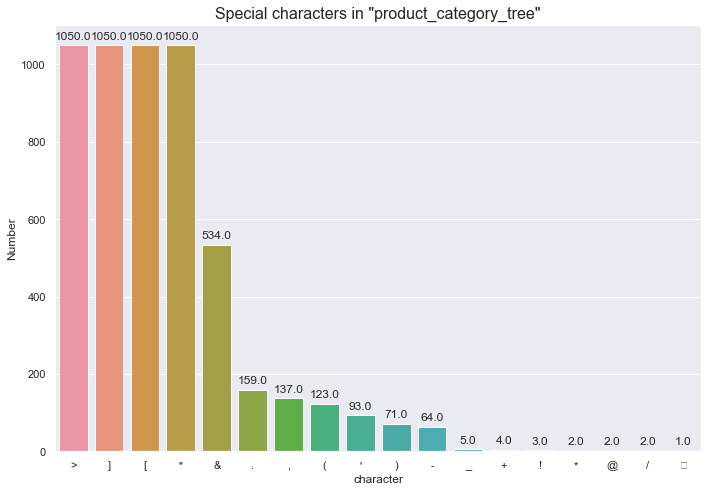

In [37]:
fig = plt.figure(figsize=(10, 7))
plot = sns.barplot(x=df_product_category_tree_special["character"], y=df_product_category_tree_special["number"])
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plt.ylabel("Number", size=12)
plt.xlabel("character", size=12)
plt.title("Special characters in \"product_category_tree\"", size=16)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the special characters in <b>product_specifications</b></p>
</div>

C:\Users\Samir\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Samir\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


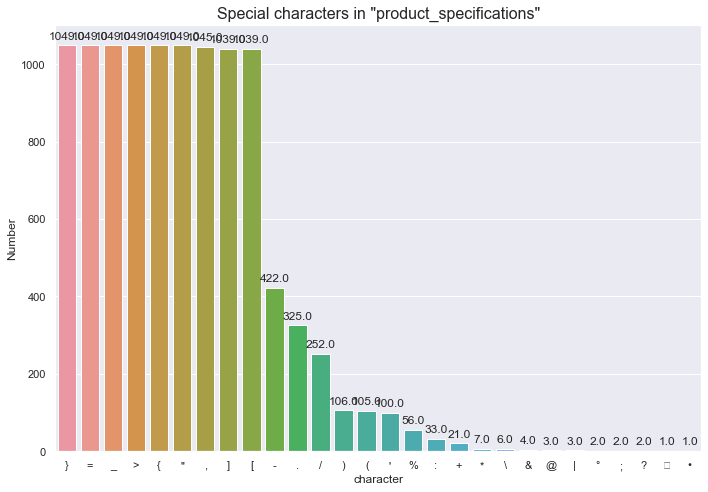

In [38]:
fig = plt.figure(figsize=(10, 7))
plot = sns.barplot(x=df_product_specifications_special["character"], y=df_product_specifications_special["number"])
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plt.ylabel("Number", size=12)
plt.xlabel("character", size=12)
plt.title("Special characters in \"product_specifications\"", size=16)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <p>Printing the digit characters in <b>product_name</b>, <b>product_category_tree</b>, <b>description</b>, <b>brand</b></p>
</div>

In [39]:
for col in text_columns:
    print(col + " has " + str(len(globals()["dict_" + col + "_numerical"])) + " digit used")

product_name has 10 digit used
product_category_tree has 10 digit used
description has 10 digit used
brand has 8 digit used
product_specifications has 10 digit used


<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: square;">
        <li>The 4 features have used numerical characters.</li>
        <li>It seems there are contractions in the text so, it is necessary to check this point.</li>
    </ul>
</div>

<div class="alert alert-block alert-info">
    <p>Deleting the datasets</p>
</div>

In [40]:
for col in text_columns:
    
    del globals()["df_" + col + "_check"]
    del globals()["df_" + col + "_special"]
    
    del df_data[col + "_check"]
        
    gc.collect()

In [41]:
df_data.head()

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   
1  7b72c92c2f6c40268628ec5f14c6d590   
2  64d5d4a258243731dc7bbb1eef49ad74   
3  d4684dcdc759dd9cdf41504698d737d8   
4  6325b6870c54cd47be6ebfbffa620ec7   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree  retail_price  \
0  ["Home Furnishing >> Curtains & Accessories >>...   1899.000000   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...    600.000000   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   1200.153846   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   2699.000000   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   2599.000000   

                                  image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3  d4684dcdc759dd9cdf41504698d737d8.jpg   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                                         description                  brand  \
0  Key Features of Elegance Polyester Multicolor ...               Elegance   
1  Specifications of Sathiyas Cotton Bath Towel (...               Sathiyas   
2  Key Features of Eurospa Cotton Terry Face Towe...                Eurospa   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...  SANTOSH ROYAL FASHION   
4  Key Features of Jaipur Print Cotton Floral Kin...           Jaipur Print   

                              product_specifications       category_1  
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing  
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care  
2  {"product_specification"=>[{"key"=>"Material",...        Baby Care  
3  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing  
4  {"product_specification"=>[{"key"=>"Machine Wa...  Home Furnishing

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">5.1.1. Checking contractions</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Let's check some contractions in the description</p>
</div>

In [42]:
characters_to_check = ["\'re", "\'d", "\'t"]

In [43]:
df_check_characters = df_data[["description"]].copy()

In [44]:
pd.set_option("display.max_rows", None) # show full of showing rows
pd.set_option("display.max_columns", None) # show full of showing cols
pd.set_option("display.max_colwidth", None) # show full width of showing cols
pd.set_option("display.float_format", lambda x: "%.5f" % x) # show full content in cell    

In [45]:
df_check_characters[df_check_characters["description"].str.contains("|".join(characters_to_check))].tail()

description
171                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Buy Prithish We're All Mad Here Ceramic Mug for Rs.175 online. Prithish We're All Mad Here Ceramic Mug at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.
187                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Prithish Wild And Free Ceramic Mug (330 ml)\r\n                         Price: Rs. 175\r\n\t\t\t\t\r\n\t\t\t"Get talking with your coffee! Our wide selection of cute and catchy designs means you're sure to find the quote that says what it is, the way it is. And if these mugs bring on the smiles, don't forget to share them. Mugs like these make great gifts! Each mug is beautifully designed with quality ink and attractive graphics, perfect for all around enjoyment." "Express yourself! Our distinctive coffee mugs give you the freedom to broadcast your own special message, from holiday cheer to your love of cupcakes. These affordable mugs are also perfect for gifting, so you can show others just how well you know them. Break out the mugs, and bring on the laughs! Happy sipping!\r\n"Get talking with your coffee! Our wide selection of cute and catchy designs means you're sure to find the quote that says what it is, the way it is. And if these mugs bring on the smiles, don't forget to share them. Mugs like these make great gifts! Each mug is beautifully designed with quality ink and attractive graphics, perfect for all around enjoyment." "Express y

In [46]:
pd.reset_option("display.max_rows") # reset max of showing rows
pd.reset_option("display.max_columns") # reset max of showing cols
pd.reset_option("display.max_colwidth") # reset width of showing cols
pd.reset_option("display.float_format") # reset show full content in cell

<div class="alert alert-block alert-info">
    <p>Deleting the dataset</p>
</div>

In [47]:
del df_check_characters
gc.collect()

19

<div class="alert alert-block alert-warning">
    <p><b>Observations / Conclusions</b></p>
    <p>At this point, we can see in the text:</p>
    <ul style="list-style-type: square;">
        <li>Characters for new line, tabs, etc..</li>
        <li>There are contractions in the descriptions.</li>
    </ul>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">5.2. Tokenization</h3>
</div>

<div class="alert alert-block alert-info">
    <p>To tokenize the text, we are going to do the following</p>
    <ul style="list-style-type: square;">
        <li>Cleaning up the text</li>
        <li>Remove stop words</li>
    </ul>
    <p>Finally, we are going to compare the results</p>
</div>    
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">5.2.2. Cleaning up the text</h4>
</div>

<div class="alert alert-block alert-info">
    <p>To clean up the text, we are going to remove the following</p>
    <ul style="list-style-type: square;">
        <li>Newlines, tabs, etc.</li>
        <li>HTML tags</li>
        <li>Extra whitespace</li>
        <li>Emails</li>
        <li>Accented characters</li>
        <li>Incorrect characters</li>
        <li>Punctuations</li>
        <li>Non alphabet characters</li>
    </ul>
    <p>Also, we are going to do: </p>
    <ul style="list-style-type: square;">
        <li>To transform to lowercase.</li>
        <li>To expand contractions</li>
    </ul>
</div>    
</div>

<div class="alert alert-block alert-info">
    <p>Reading a english contractions dictionay</p>
</div>

In [48]:
file = open("datasets\english_contractions.txt")
contents = file.read()
english_contractions = ast.literal_eval(contents)
file.close()

<div class="alert alert-block alert-info">
    <p>Let's cleaning the features</p>
</div>

In [49]:
initial_tokens_by_feature, cleaned_words_by_feature = [{} for i in range(2)]
for col in text_columns:
    
    # Tokenization of text without clean
    df_data[col + "_initial"] = df_data[col].apply(lambda x: tokenizer(x))
    initial_tokens_by_feature[col] = df_data[col + "_initial"].explode().dropna().value_counts().shape[0]
    del df_data[col + "_initial"]
    
    # Tokenization of text after cleanning
    if col == "product_specifications":
        df_data[col + "_cleaned"] = df_data[col].apply(lambda x: cleaning_up_product_specifications(x))
        df_data[col + "_cleaned"] = df_data[col + "_cleaned"].apply(lambda x: cleaning_up_text(x, english_contractions))
    else:    
        df_data[col + "_cleaned"] = df_data[col].apply(lambda x: cleaning_up_text(x, english_contractions))
    
    cleaned_words_by_feature[col] = df_data[col + "_cleaned"].explode().dropna().value_counts().shape[0]
    
    
# Sorting dict by value desc
initial_tokens_by_feature = sorted(initial_tokens_by_feature.items(), key=operator.itemgetter(1), reverse=True)
initial_tokens_by_feature = {k:v for k, v in initial_tokens_by_feature}

cleaned_words_by_feature = sorted(cleaned_words_by_feature.items(), key=operator.itemgetter(1), reverse=True)
cleaned_words_by_feature = {k:v for k, v in cleaned_words_by_feature}

In [50]:
pd.set_option("display.max_rows", None) # show full of showing rows
pd.set_option("display.max_columns", None) # show full of showing cols
pd.set_option("display.max_colwidth", None) # show full width of showing cols
pd.set_option("display.float_format", lambda x: "%.5f" % x) # show full content in cell    

In [51]:
df_data.head(1)

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   

                                                 product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet Door Curtain   

                                                                                              product_category_tree  \
0  ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]   

   retail_price                                 image  \
0    1899.00000  55b85ea15a1536d46b7190ad6fff8ce7.jpg   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    description  \
0  Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester   

      brand  \
0  Elegance   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    product_specifications  \
0  {"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"},

In [52]:
pd.reset_option("display.max_rows") # reset max of showing rows
pd.reset_option("display.max_columns") # reset max of showing cols
pd.reset_option("display.max_colwidth") # reset width of showing cols
pd.reset_option("display.float_format") # reset show full content in cell

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">5.2.2. Removing words</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Now, we are going to reduce words based on the following:</p>
    <ul style="list-style-type: square;">
        <li>Stop words</li>
        <li>Non english words</li>
        <li>Keep Nouns</li>
    </ul>    
    <p>It must consider that the mission is not about sentiment analysis, it is about classification</p>
</div>

In [53]:
reduced_words_by_feature = {}
for col in text_columns:
    df_data[col + "_tokens"] = df_data[col + "_cleaned"].apply(lambda x: remove_words(x, "english"))
    reduced_words_by_feature[col] = df_data[col + "_tokens"].explode().dropna().value_counts().shape[0]

    del df_data[col + "_cleaned"]
    
# Sorting dict by value descending
reduced_words_by_feature = sorted(reduced_words_by_feature.items(), key=operator.itemgetter(1), reverse=True)
reduced_words_by_feature = {k:v for k, v in reduced_words_by_feature}

In [54]:
pd.set_option("display.max_rows", None) # show full of showing rows
pd.set_option("display.max_columns", None) # show full of showing cols
pd.set_option("display.max_colwidth", None) # show full width of showing cols
pd.set_option("display.float_format", lambda x: "%.5f" % x) # show full content in cell    

In [55]:
df_data.head(1)

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   

                                                 product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet Door Curtain   

                                                                                              product_category_tree  \
0  ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]   

   retail_price                                 image  \
0    1899.00000  55b85ea15a1536d46b7190ad6fff8ce7.jpg   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    description  \
0  Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester   

      brand  \
0  Elegance   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    product_specifications  \
0  {"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"},

In [56]:
pd.reset_option("display.max_rows") # reset max of showing rows
pd.reset_option("display.max_columns") # reset max of showing cols
pd.reset_option("display.max_colwidth") # reset width of showing cols
pd.reset_option("display.float_format") # reset show full content in cell

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">5.2.3. Compare the results</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Let's compare the number of words during the all process</p>
</div>

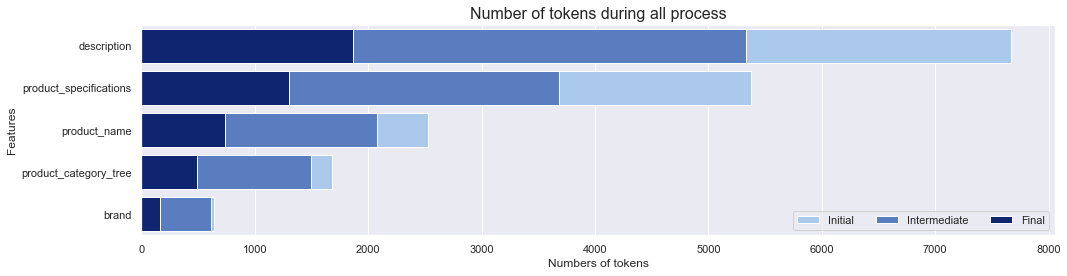

In [57]:
fig = plt.figure(figsize=(15, 4))

# Plot the total words tokenized
sns.set_color_codes("pastel")
plot = sns.barplot(x=list(initial_tokens_by_feature.values()),
                   y=list(initial_tokens_by_feature.keys()), 
                   label="Initial", color="b")

# Plot the words tokenized after cleanning up
sns.set_color_codes("muted")
plot = sns.barplot(x=list(cleaned_words_by_feature.values()),
                   y=list(cleaned_words_by_feature.keys()),
                   label="Intermediate", color="b")

# Plot the words tokenized after reducing stop words
sns.set_color_codes("dark")
plot = sns.barplot(x=list(reduced_words_by_feature.values()),
                   y=list(reduced_words_by_feature.keys()),
                   label="Final", color="b")

plt.legend(ncol=3, loc="lower right", frameon=True)
plt.xlabel("Numbers of tokens", size=12)
plt.ylabel("Features", size=12)
plt.title("Number of tokens during all process", size=16)
plt.tight_layout()
plt.savefig("images/text_analysis/number-of-tokens-during-process.png")
plt.show()

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>Here, we can see how the tokens have reduced during all process, being description the features with more tokens during the process</p>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">5.3. Stemming the tokens</h3>
</div>

<div class="alert alert-block alert-info">
    <p>We use <b>Porter stemming algorithm</b> because it has a less agressive approach in comparison with <b>Plancaster stemming algorithm</b></p>
</div>

In [58]:
for col in text_columns:
    df_data[col + "_stemmed"] = df_data[col + "_tokens"].apply(lambda x: stem_words(x))

In [59]:
pd.set_option("display.max_rows", None) # show full of showing rows
pd.set_option("display.max_columns", None) # show full of showing cols
pd.set_option("display.max_colwidth", None) # show full width of showing cols
pd.set_option("display.float_format", lambda x: "%.5f" % x) # show full content in cell    

In [60]:
df_data[["description", "description_tokens", "description_stemmed"]].head(3)

description  \
0  Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel   
2                                                                                                                                                                    Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prints, absorbency, softness and durability. NOTE: Our product is 100% cotton, so it is susceptible to shrinkage. Product color may vary from the picture. Size may vary by ±3% WASH CARE: Wash in cold Water, Do not Iron, Do not Bleach, Flat dry, Wash before first use. SIZE- FACE TOWEL - 23 cms X 23 cms.,Specifications of Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Bath Towel Features Material Cotton Terry Design SHUVAM General Brand Eurospa GS

In [61]:
pd.reset_option("display.max_rows") # reset max of showing rows
pd.reset_option("display.max_columns") # reset max of showing cols
pd.reset_option("display.max_colwidth") # reset width of showing cols
pd.reset_option("display.float_format") # reset show full content in cell@nhurpertuzs

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">5.4. Lemmatization the tokens</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's do the lemmatization</p>
</div>

In [62]:
for col in text_columns:
    df_data[col + "_lemma"] = df_data[col + "_tokens"].apply(lambda x: lemma_words(x))

In [63]:
pd.set_option("display.max_rows", None) # show full of showing rows
pd.set_option("display.max_columns", None) # show full of showing cols
pd.set_option("display.max_colwidth", None) # show full width of showing cols
pd.set_option("display.float_format", lambda x: "%.5f" % x) # show full content in cell    

In [64]:
df_data[["description", "description_tokens", "description_stemmed", "description_lemma"]].head(2)

description  \
0  Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         description_tokens  \
0  [elegance, polyester, multicolor, eyelet, door, curtain, elegance, polyester, multicolor, eyelet, door, curtain, price, curtain, look, curtain, quality, polyester, eyelet, style, stitch, metal, room, environment, loving, curtain, wrinkle, shrinkage, home, bright, appeal, attention, hearts, eyelet, valance, slide, thing, morning, sun, morning, world, draw, evening, create, beauty, bring, home, elegant, curtain, room, amount, elegance, polyester, multico

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>At this point, we can see an example of text after doing all process</p>
    <p>It seems that the lemmatization have got better results than stemming</p>
</div>

<div style="background-color: #506AB9;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">5.5. Text Vectorization</h3>
</div>

<div class="alert alert-block alert-info">
    <p>First of all, let's see all features transformed</p>
</div>

In [65]:
for col in text_columns:
    
    if col == "description":
        head = 2
    else:
        head = 5
    
    print("-"*200)
    print(" >> " + col)
    display(df_data[[col, col + "_tokens", col + "_stemmed", col + "_lemma"]].head(head))
    print("\n")

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 >> product_name


product_name  \
0       Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                       Sathiyas Cotton Bath Towel   
2                              Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4            Jaipur Print Cotton Floral King sized Double Bedsheet   

                                        product_name_tokens  \
0  [elegance, polyester, multicolor, eyelet, door, curtain]   
1                                     [cotton, bath, towel]   
2                         [cotton, terry, face, towel, set]   
3                                         [fashion, cotton]   
4                                     [print, cotton, king]   

                                 product_name_stemmed  \
0  [eleg, polyest, multicolor, eyelet, door, curtain]   
1                               [cotton, bath, towel]   
2                   [cotton, terri, face, towel, set]   
3                                   [fashion, cotton]   
4                               [print, cotton, king]   

                                         product_name_lemma  
0  [elegance, polyester, multicolor, eyelet, door, curtain]  
1                                     [cotton, bath, towel]  
2                         [cotton, terry, face, towel, set]  
3                                         [fashion, cotton]  
4                                     [print, cotton, king]



--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 >> product_category_tree


product_category_tree  \
0                           ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]   
2   ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]   
3    ["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]   
4             ["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]   

                                                              product_category_tree_tokens  \
0                                [home, elegance, polyester, multicolor, abstract, eyelet]   
1       [baby, care, baby, bath, skin, baby, bath, baby, cotton, bath, towel, bath, towel]   
2  [baby, care, baby, bath, skin, baby, bath, baby, cotton, terry, face, towel, piece, fa]   
3                                      [home, furnishing, fashion, royal, fashion, cotton]   
4                                      [home, furnishing, print, print, cotton, king, bed]   

                                                            product_category_tree_stemmed  \
0                                     [home, eleg, polyest, multicolor, abstract, eyelet]   
1      [babi, care, babi, bath, skin, babi, bath, babi, cotton, bath, towel, bath, towel]   
2  [babi, care, babi, bath, skin, babi, bath, babi, cotton, terri, face, towel, piec, fa]   
3                                        [home, furnish, fashion, royal, fashion, cotton]   
4                                        [home, furnish, print, print, cotton, king, bed]   

                                                               product_category_tree_lemma  
0                                [home, elegance, polyester, multicolor, abstract, eyelet]  
1       [baby, care, baby, bath, skin, baby, bath, baby, cotton, bath, towel, bath, towel]  
2  [baby, care, baby, bath, skin, baby, bath, baby, cotton, terry, face, towel, piece, fa]  
3                                      [home, furnishing, fashion, royal, fashion, cotton]  
4                                      [home, furnishing, print, print, cotton, king, bed]



--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 >> description


description  \
0  Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         description_tokens  \
0  [elegance, polyester, multicolor, eyelet, door, curtain, elegance, polyester, multicolor, eyelet, door, curtain, price, curtain, look, curtain, quality, polyester, eyelet, style, stitch, metal, room, environment, loving, curtain, wrinkle, shrinkage, home, bright, appeal, attention, hearts, eyelet, valance, slide, thing, morning, sun, morning, world, draw, evening, create, beauty, bring, home, elegant, curtain, room, amount, elegance, polyester, multico



--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 >> brand


brand brand_tokens brand_stemmed brand_lemma
0               Elegance   [elegance]        [eleg]  [elegance]
1               Sathiyas           []            []          []
2                Eurospa           []            []          []
3  SANTOSH ROYAL FASHION    [fashion]     [fashion]   [fashion]
4           Jaipur Print      [print]       [print]     [print]



--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 >> product_specifications


product_specifications  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             {"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"}, {"key"=>"Designed For", "value"=>"Door"}, {"key"=>"Type", "value"=>"Eyelet"}, {"key"=>"Model Name", "value"=>"Abstract Polyester Door Curtain Set Of 2"}, {"key"=>"Model ID", "value"=>"Duster25"}, {"key"=>"Color", "value"=>"Multicolor"}, {"key"=>"Length", "value"=>"213 cm"}, {"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 2"}, {"key"=>"Sales Package", "value"=>"2 Curtains"}, {"key"=>"Material", "value"=>"Polyester"}]}   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     {"product_specification"=>[{"key"=>"Machine Washable", "value"=>"Yes"}, {"key"=>"Material", "value"=>"Cotton"}, {"key"=>"Design", "value"=>"Self Design"}, {"key"=>"Brand", "value"=>"Sathiyas"}, {"key"=>"Type", "value"=>"Bath Towel"}, {"key"=>"GSM", "value"=>"500"}, {"key"=>"Model Name", "value"=>"Sathiyas cotton bath towel"}, {"key"=>"Ideal For", "value"=>"Men, Women, Boys, Girls"}, {"key"=>"Model ID", "value"=>"asvtwl322"}, {"key"=>"Color", "value"=>"Red, Yellow, Blue"}, {"key"=>"Size", "value"=>"Mediam"}, {"key"=>"Length", "value"=>"30 inch"}, {"key"=>"Width", "value"=>"60 inch"}, {"key"=>"Number of Contents in Sales Package", "value"=>"3"}, {"key"=>"Sales Package", "value"=>"3 Bath Towel"}]}   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              {"product_specification"=>[{"key"=>"Material", "value"=>"Cotton Terry"}, {"key"=>"Design", "value"=>"SHUVAM"}, {"key"=>"Brand", "value"=>"Eurospa"}, {"key"=>"GSM", "value"=>"360"}, {"key"=>"Type", "value"=>"Face Towel Set"}, {"key"=>"Model Name", "value"=>"SHUVAM20PCFTSETASSORTED"}, {"key"=>"Ideal For", "value"=>"Boys, Girls, Men, Women"}, {"key"=>"Model ID", "value"=>"SHUVAM20PCFTSETASSORTED"}, {"key"=>"Size", "value"=>"small"}, {"key"=>"Color", "value"=>"Assorted"}, {"key"=>"Weight", "value"=>"350 g"}, {"key"=>"Length", "value"=>"9 inch"}, {"key"=>"Width", "value"=>"9 inch"}, {"key"=>"Number of Contents in Sales Package", "value"=>"20"}, {"key"=>"Sales Package", "value"=>"20 PIECE FACE TOWEL SET"}]}   
3                                                                                                                                         {"product_specification"=>[{"key"=>"Brand", "value"=>"SANTOSH ROYAL FASHION"}, {"key"=>"Machine Washable", "value"=>"Yes"}, {"key"=>"Type", "value"=>"Flat"}, {"key"=>"Material", "value"=>"Cotton"}, {"key"=>"Mo

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>At this point, we can see how the features have been transformed</p>
</div>

In [66]:
pd.reset_option("display.max_rows") # reset max of showing rows
pd.reset_option("display.max_columns") # reset max of showing cols
pd.reset_option("display.max_colwidth") # reset width of showing cols
pd.reset_option("display.float_format") # reset show full content in cell

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">5.5.1. Thresholds lower frequency</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Before doing the <b>Text Vectorization</b>, let's analyse the number of words with lower frequency in each feature, to define the threshold (min_df) to tream them </p>
    <p>To do that we are going to use BoW in default mode and plot the numbers of words with lower frequency</p>
</div>

In [67]:
cv_vectorizer = CountVectorizer()

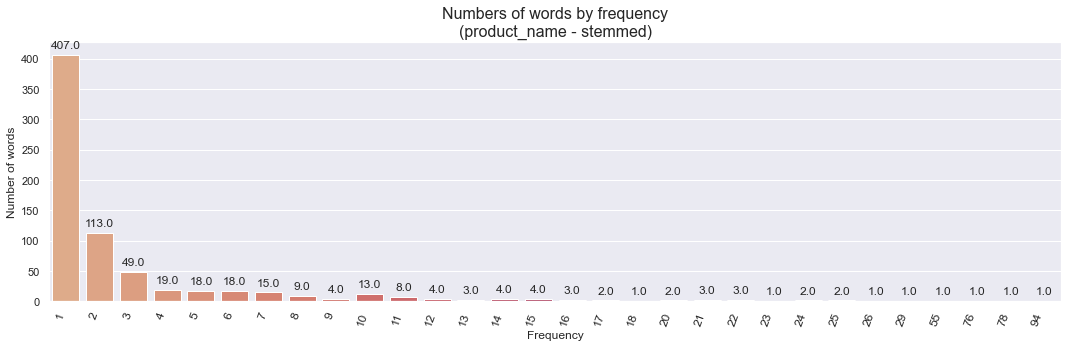

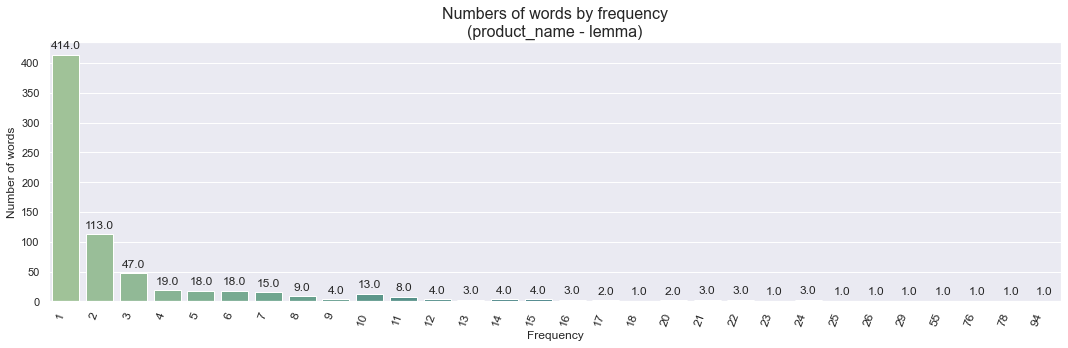

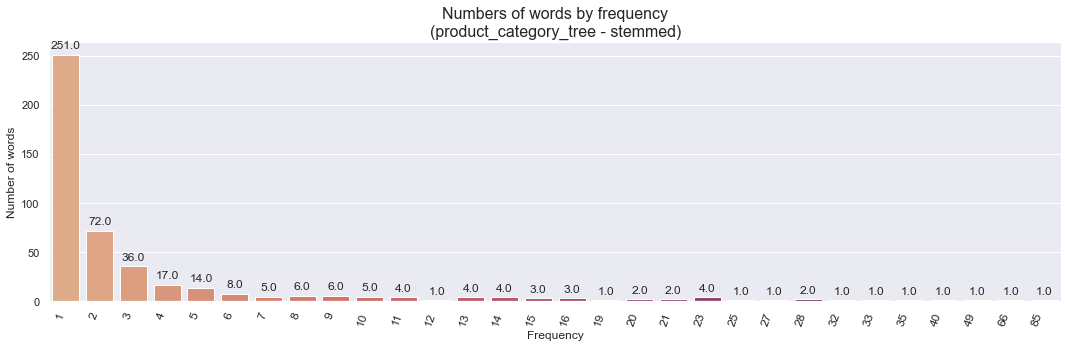

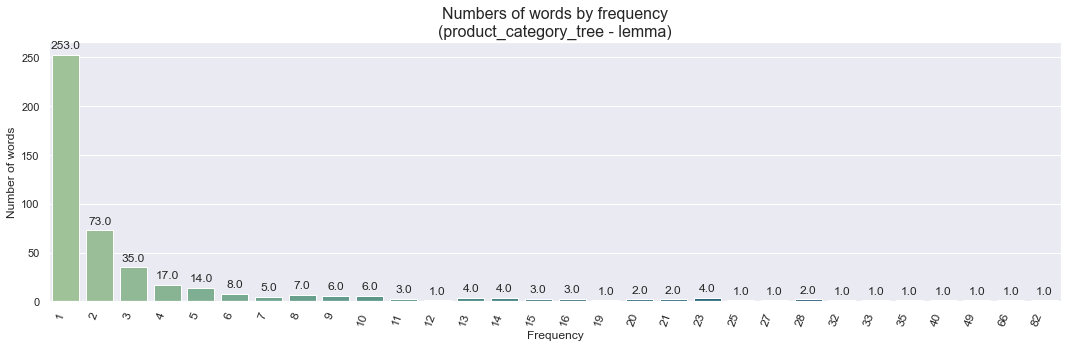

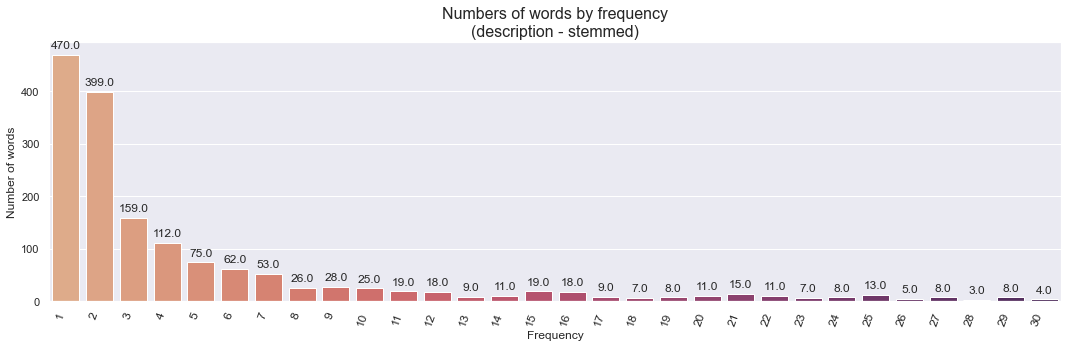

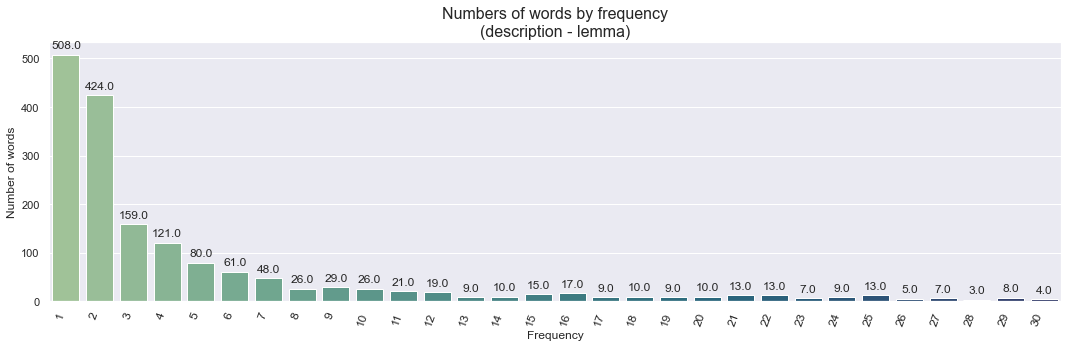

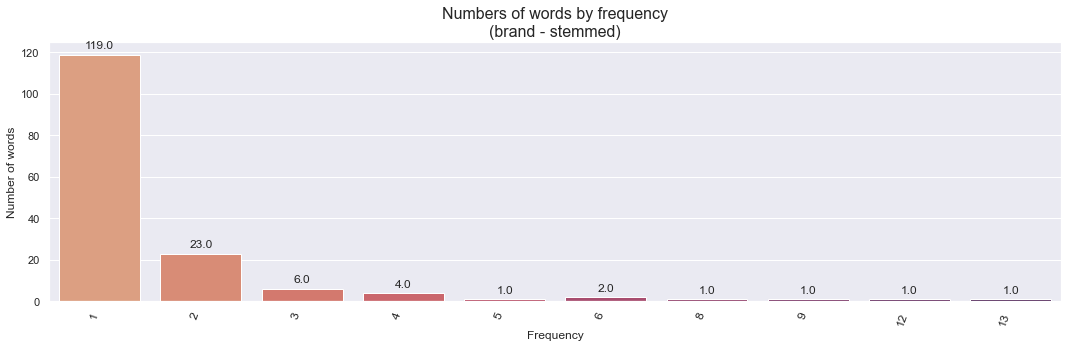

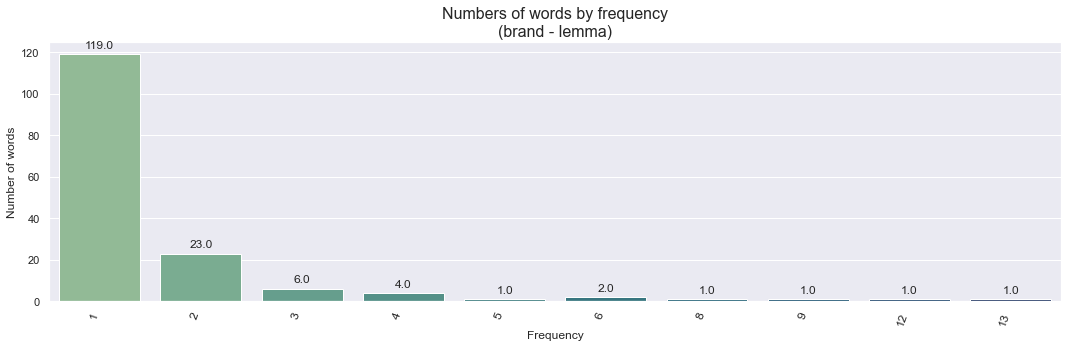

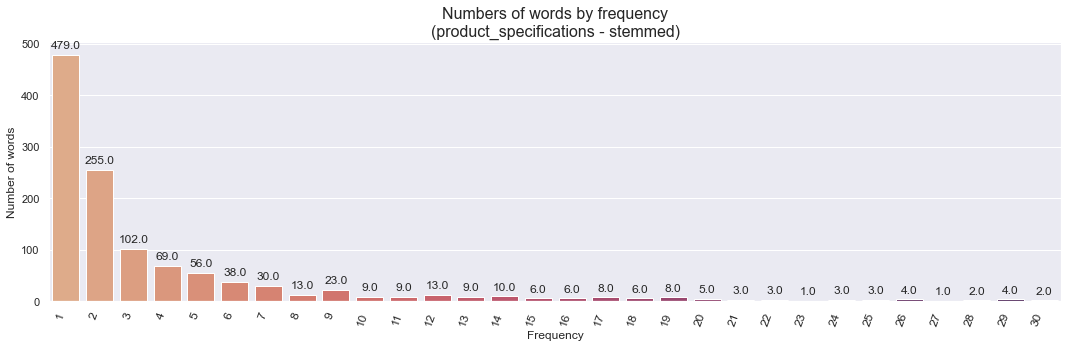

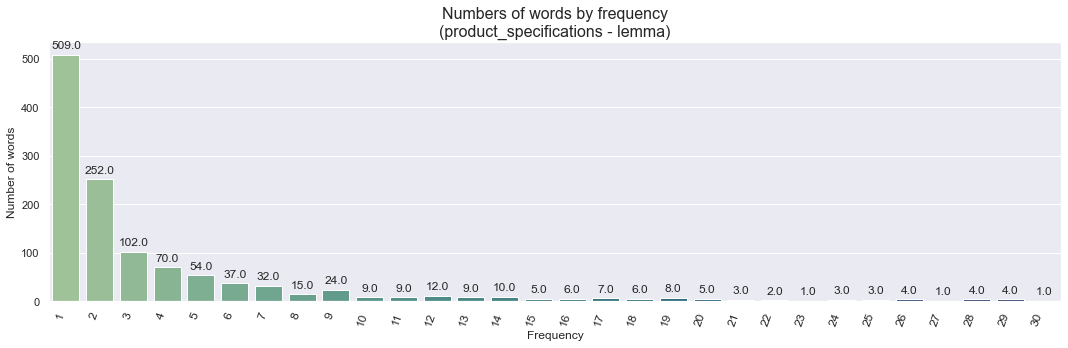

In [68]:
for col in text_columns:
    
    for var in ["stemmed", "lemma"]:
        
        globals()["bow_" + col + "_" + var] = cv_vectorizer.fit_transform(df_data[col + "_" + var].astype("U"))
        globals()["df_bow_" + col + "_" + var] = pd.DataFrame(globals()["bow_" + col + "_" + var].toarray(),
                                                              columns=cv_vectorizer.get_feature_names_out())
        
        if var == "stemmed":
            palette = "flare"
        else:
            palette = "crest"
        
        # Plottint the results
        most_frequent_words = (globals()["df_bow_" + col + "_" + var].sum(axis=0)).sort_values(ascending=True)
        globals()["df_lower_frequent_words_" + col + "_" + var] = pd.DataFrame.from_dict({"words" : most_frequent_words.index,
                                                                                          "frequency" : most_frequent_words.values})

        lower_frequent_words = globals()["df_lower_frequent_words_" + col + "_" + var].groupby("frequency")["frequency"].count().head(30)

        fig = plt.figure(figsize=(15, 5))
        plot = sns.barplot(x=lower_frequent_words.index, y=lower_frequent_words, palette=palette)
        for p in plot.patches:
            plot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha="center", va="center", xytext=(0, 9), textcoords="offset points")
        plot.set_xticklabels(labels=lower_frequent_words.index, rotation=70, size=12,
                                 horizontalalignment="right")
        plt.ylabel("Number of words", size=12)
        plt.xlabel("Frequency", size=12)
        plt.title("Numbers of words by frequency\n(" + col + " - " + var + ")", size=16)
        plt.tight_layout()
        plt.show()
            
    print("\n\n")


<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>Now, we are going to define the following thresholds (min_df)</p>
    <ul style="list-style-type: square;">
        <li>product_name: min_df=3</li>
        <li>product_category_tree: min_df=3</li>
        <li>description: min_df=5</li>
        <li>brand: min_df=2</li>
        <li>product_specifications:min_df=4</li>
    </ul>  
</div>

In [69]:
text_columns = {
    "product_name": 3,
    "product_category_tree": 3,
    "description": 5,
    "brand": 2,
    "product_specifications": 4
}

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">5.5.2. Bag of Word - BoW</h4>
</div>

In [70]:
pd.set_option("display.max_columns", 25) # show full of showing cols

<div class="alert alert-block alert-info">
    <p>Now, we are going to do a BoW for each feature, considering the stemmed and lemma treatments</p>
    <p>Let's initialize the CountVectorizer based on the min_df defined</p>
</div>

In [71]:
for key, value in text_columns.items():
    
    # Initializing the CountVectorizer based on the min_df defined previously
    cv_vectorizer = CountVectorizer(min_df=value)
    
    for var in ["stemmed", "lemma"]:
        
        globals()["bow_" + key + "_" + var] = cv_vectorizer.fit_transform(df_data[key + "_" + var].astype("U"))
        globals()["df_bow_" + key + "_" + var] = pd.DataFrame(globals()["bow_" + key + "_" + var].toarray(),
                                                              columns=cv_vectorizer.get_feature_names_out())

<div class="alert alert-block alert-info">
    <p>Printing some resultants datasets</p>
</div>

In [72]:
print("-"*120)
print(" >> product_name_stemmed")
display(df_bow_product_name_stemmed.head())
print(" >> product_name_lemma")
display(df_bow_product_name_lemma.head())
print("\n")
print("-"*120)
print(" >> description_stemmed")
display(df_bow_description_stemmed.head())
print(" >> description_lemma")
display(df_bow_description_lemma.head())

------------------------------------------------------------------------------------------------------------------------
 >> product_name_stemmed


abstract  adapt  aero  air  almond  antiqu  appl  aroma  art  babi  bag  \
0         0      0     0    0       0       0     0      0    0     0    0   
1         0      0     0    0       0       0     0      0    0     0    0   
2         0      0     0    0       0       0     0      0    0     0    0   
3         0      0     0    0       0       0     0      0    0     0    0   
4         0      0     0    0       0       0     0      0    0     0    0   

   band  ...  vintag  vinyl  wall  watch  water  wheel  window  wireless  \
0     0  ...       0      0     0      0      0      0       0         0   
1     0  ...       0      0     0      0      0      0       0         0   
2     0  ...       0      0     0      0      0      0       0         0   
3     0  ...       0      0     0      0      0      0       0         0   
4     0  ...       0      0     0      0      0      0       0         0   

   wood  wow  wrap  ym  
0     0    0     0   0  
1     0    0     0   0  
2     0    0     0   0  
3     0    0     0   0  
4     0    0     0   0  

[5 rows x 195 columns]

 >> product_name_lemma


abstract  adapter  aero  air  almond  antique  apple  aroma  art  baby  \
0         0        0     0    0       0        0      0      0    0     0   
1         0        0     0    0       0        0      0      0    0     0   
2         0        0     0    0       0        0      0      0    0     0   
3         0        0     0    0       0        0      0      0    0     0   
4         0        0     0    0       0        0      0      0    0     0   

   bag  band  ...  vintage  vinyl  wall  watch  water  wheel  window  \
0    0     0  ...        0      0     0      0      0      0       0   
1    0     0  ...        0      0     0      0      0      0       0   
2    0     0  ...        0      0     0      0      0      0       0   
3    0     0  ...        0      0     0      0      0      0       0   
4    0     0  ...        0      0     0      0      0      0       0   

   wireless  wood  wow  wrap  ym  
0         0     0    0     0   0  
1         0     0    0     0   0  
2         0     0    0     0   0  
3         0     0    0     0   0  
4         0     0    0     0   0  

[5 rows x 193 columns]



------------------------------------------------------------------------------------------------------------------------
 >> description_stemmed


absorb  abstract  adapt  addit  afford  age  air  almond  aluminium  \
0       0         0      0      0       0    0    0       0          0   
1       0         0      0      0       0    0    0       0          0   
2       1         0      0      0       0    0    0       0          0   
3       0         0      0      0       0    0    0       0          0   
4       0         0      0      0       0    0    0       0          0   

   antiqu  appeal  appear  ...  weight  wheel  width  window  wireless  wood  \
0       0       1       0  ...       0      0      0       0         0     0   
1       0       0       0  ...       0      0      1       0         0     0   
2       0       0       0  ...       0      0      1       0         0     0   
3       0       0       0  ...       0      0      3       0         0     0   
4       0       0       0  ...       0      0      3       0         0     0   

   wooden  work  world  wrap  year  ym  
0       0     0      1     0     0   0  
1       0     0      0     0     0   0  
2       0     0      0     0     0   0  
3       0     0      0     0     0   0  
4       0     0      0     0     0   0  

[5 rows x 429 columns]

 >> description_lemma


abstract  adapter  addition  affordable  age  air  almond  aluminium  \
0         0        0         0           0    0    0       0          0   
1         0        0         0           0    0    0       0          0   
2         0        0         0           0    0    0       0          0   
3         0        0         0           0    0    0       0          0   
4         0        0         0           0    0    0       0          0   

   antique  appeal  appearance  apple  ...  weight  wheel  width  window  \
0        0       1           0      0  ...       0      0      0       0   
1        0       0           0      0  ...       0      0      1       0   
2        0       0           0      0  ...       0      0      1       0   
3        0       0           0      0  ...       0      0      3       0   
4        0       0           0      0  ...       0      0      3       0   

   wireless  wood  wooden  work  world  wrap  year  ym  
0         0     0       0     0      1     0     0   0  
1         0     0       0     0      0     0     0   0  
2         0     0       0     0      0     0     0   0  
3         0     0       0     0      0     0     0   0  
4         0     0       0     0      0     0     0   0  

[5 rows x 427 columns]

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">5.5.3. Term Frequency - TF-IDF</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Now, we are going to do a TF-IDF for each feature, considering the stemmed and lemma treatments</p>
    <p>Let's initialize the TfidfVectorizer based on the min_df defined</p>
</div>

In [73]:
for key, value in text_columns.items():
    
    # Initializing the TfidfVectorizer based on the min_df defined previously
    tfidf_vectorizer = TfidfVectorizer(min_df=value)
    
    for var in ["stemmed", "lemma"]:
        
        globals()["tfidf_" + key + "_" + var] = tfidf_vectorizer.fit_transform(df_data[key + "_" + var].astype("U"))
        globals()["df_tfidf_" + key + "_" + var] = pd.DataFrame(globals()["tfidf_" + key + "_" + var].toarray(),
                                                                columns=tfidf_vectorizer.get_feature_names_out())

<div class="alert alert-block alert-info">
    <p>Printing some resultants datasets</p>
</div>

In [74]:
print("-"*120)
print(" >> product_name_stemmed")
display(df_tfidf_product_name_stemmed.head())
print(" >> product_name_lemma")
display(df_tfidf_product_name_lemma.head())
print("\n")
print("-"*120)
print(" >> description_stemmed")
display(df_tfidf_description_stemmed.head())
print(" >> description_lemma")
display(df_tfidf_description_lemma.head())

------------------------------------------------------------------------------------------------------------------------
 >> product_name_stemmed


abstract  adapt  aero  air  almond  antiqu  appl  aroma  art  babi  bag  \
0       0.0    0.0   0.0  0.0     0.0     0.0   0.0    0.0  0.0   0.0  0.0   
1       0.0    0.0   0.0  0.0     0.0     0.0   0.0    0.0  0.0   0.0  0.0   
2       0.0    0.0   0.0  0.0     0.0     0.0   0.0    0.0  0.0   0.0  0.0   
3       0.0    0.0   0.0  0.0     0.0     0.0   0.0    0.0  0.0   0.0  0.0   
4       0.0    0.0   0.0  0.0     0.0     0.0   0.0    0.0  0.0   0.0  0.0   

   band  ...  vintag  vinyl  wall  watch  water  wheel  window  wireless  \
0   0.0  ...     0.0    0.0   0.0    0.0    0.0    0.0     0.0       0.0   
1   0.0  ...     0.0    0.0   0.0    0.0    0.0    0.0     0.0       0.0   
2   0.0  ...     0.0    0.0   0.0    0.0    0.0    0.0     0.0       0.0   
3   0.0  ...     0.0    0.0   0.0    0.0    0.0    0.0     0.0       0.0   
4   0.0  ...     0.0    0.0   0.0    0.0    0.0    0.0     0.0       0.0   

   wood  wow  wrap   ym  
0   0.0  0.0   0.0  0.0  
1   0.0  0.0   0.0  0.0  
2   0.0  0.0   0.0  0.0  
3   0.0  0.0   0.0  0.0  
4   0.0  0.0   0.0  0.0  

[5 rows x 195 columns]

 >> product_name_lemma


abstract  adapter  aero  air  almond  antique  apple  aroma  art  baby  \
0       0.0      0.0   0.0  0.0     0.0      0.0    0.0    0.0  0.0   0.0   
1       0.0      0.0   0.0  0.0     0.0      0.0    0.0    0.0  0.0   0.0   
2       0.0      0.0   0.0  0.0     0.0      0.0    0.0    0.0  0.0   0.0   
3       0.0      0.0   0.0  0.0     0.0      0.0    0.0    0.0  0.0   0.0   
4       0.0      0.0   0.0  0.0     0.0      0.0    0.0    0.0  0.0   0.0   

   bag  band  ...  vintage  vinyl  wall  watch  water  wheel  window  \
0  0.0   0.0  ...      0.0    0.0   0.0    0.0    0.0    0.0     0.0   
1  0.0   0.0  ...      0.0    0.0   0.0    0.0    0.0    0.0     0.0   
2  0.0   0.0  ...      0.0    0.0   0.0    0.0    0.0    0.0     0.0   
3  0.0   0.0  ...      0.0    0.0   0.0    0.0    0.0    0.0     0.0   
4  0.0   0.0  ...      0.0    0.0   0.0    0.0    0.0    0.0     0.0   

   wireless  wood  wow  wrap   ym  
0       0.0   0.0  0.0   0.0  0.0  
1       0.0   0.0  0.0   0.0  0.0  
2       0.0   0.0  0.0   0.0  0.0  
3       0.0   0.0  0.0   0.0  0.0  
4       0.0   0.0  0.0   0.0  0.0  

[5 rows x 193 columns]



------------------------------------------------------------------------------------------------------------------------
 >> description_stemmed


absorb  abstract  adapt  addit  afford  age  air  almond  aluminium  \
0  0.000000       0.0    0.0    0.0     0.0  0.0  0.0     0.0        0.0   
1  0.000000       0.0    0.0    0.0     0.0  0.0  0.0     0.0        0.0   
2  0.089126       0.0    0.0    0.0     0.0  0.0  0.0     0.0        0.0   
3  0.000000       0.0    0.0    0.0     0.0  0.0  0.0     0.0        0.0   
4  0.000000       0.0    0.0    0.0     0.0  0.0  0.0     0.0        0.0   

   antiqu   appeal  appear  ...  weight  wheel     width  window  wireless  \
0     0.0  0.08159     0.0  ...     0.0    0.0  0.000000     0.0       0.0   
1     0.0  0.00000     0.0  ...     0.0    0.0  0.087727     0.0       0.0   
2     0.0  0.00000     0.0  ...     0.0    0.0  0.054464     0.0       0.0   
3     0.0  0.00000     0.0  ...     0.0    0.0  0.230333     0.0       0.0   
4     0.0  0.00000     0.0  ...     0.0    0.0  0.179025     0.0       0.0   

   wood  wooden  work     world  wrap  year   ym  
0   0.0     0.0   0.0  0.072418   0.0   0.0  0.0  
1   0.0     0.0   0.0  0.000000   0.0   0.0  0.0  
2   0.0     0.0   0.0  0.000000   0.0   0.0  0.0  
3   0.0     0.0   0.0  0.000000   0.0   0.0  0.0  
4   0.0     0.0   0.0  0.000000   0.0   0.0  0.0  

[5 rows x 429 columns]

 >> description_lemma


abstract  adapter  addition  affordable  age  air  almond  aluminium  \
0       0.0      0.0       0.0         0.0  0.0  0.0     0.0        0.0   
1       0.0      0.0       0.0         0.0  0.0  0.0     0.0        0.0   
2       0.0      0.0       0.0         0.0  0.0  0.0     0.0        0.0   
3       0.0      0.0       0.0         0.0  0.0  0.0     0.0        0.0   
4       0.0      0.0       0.0         0.0  0.0  0.0     0.0        0.0   

   antique    appeal  appearance  apple  ...  weight  wheel     width  window  \
0      0.0  0.083963         0.0    0.0  ...     0.0    0.0  0.000000     0.0   
1      0.0  0.000000         0.0    0.0  ...     0.0    0.0  0.087717     0.0   
2      0.0  0.000000         0.0    0.0  ...     0.0    0.0  0.054674     0.0   
3      0.0  0.000000         0.0    0.0  ...     0.0    0.0  0.230085     0.0   
4      0.0  0.000000         0.0    0.0  ...     0.0    0.0  0.178925     0.0   

   wireless  wood  wooden  work     world  wrap  year   ym  
0       0.0   0.0     0.0   0.0  0.074524   0.0   0.0  0.0  
1       0.0   0.0     0.0   0.0  0.000000   0.0   0.0  0.0  
2       0.0   0.0     0.0   0.0  0.000000   0.0   0.0  0.0  
3       0.0   0.0     0.0   0.0  0.000000   0.0   0.0  0.0  
4       0.0   0.0     0.0   0.0  0.000000   0.0   0.0  0.0  

[5 rows x 427 columns]

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">5.5.4. Compare the results</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Let's compare the words most frequents based on BoW and TI-IDF</p>
</div>

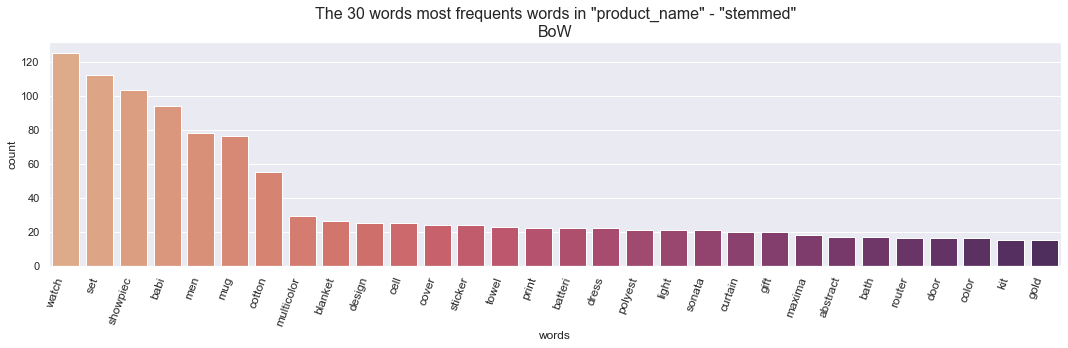

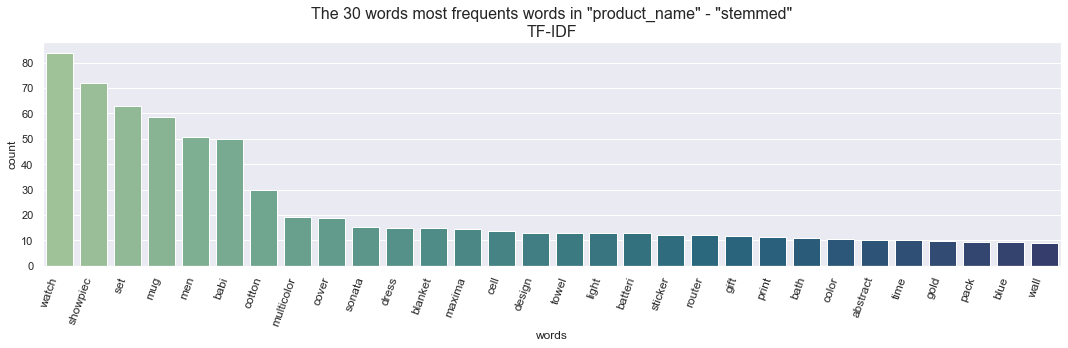

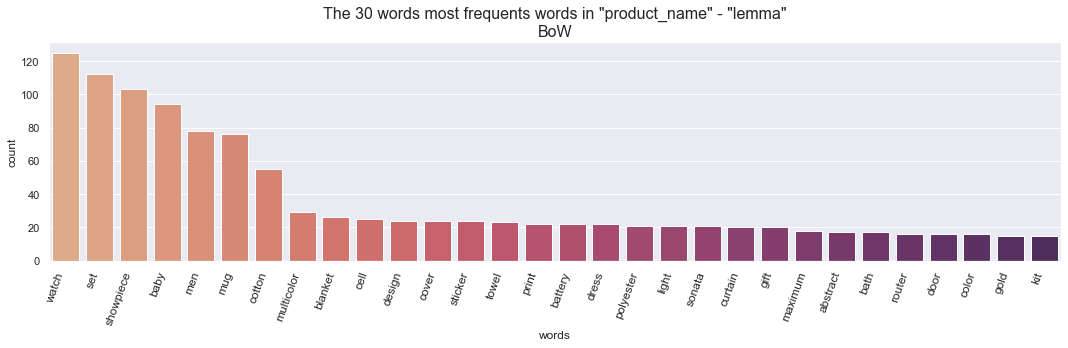

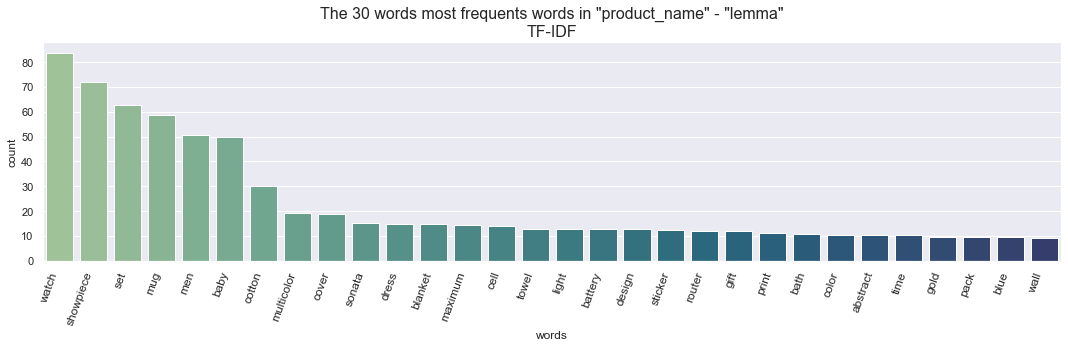

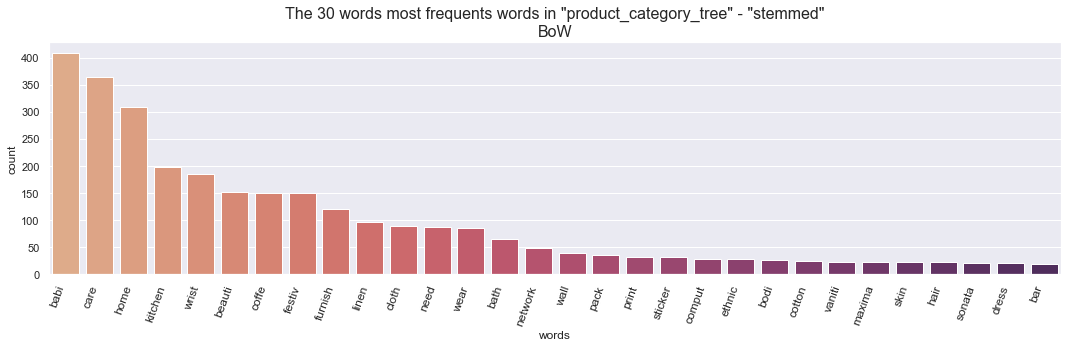

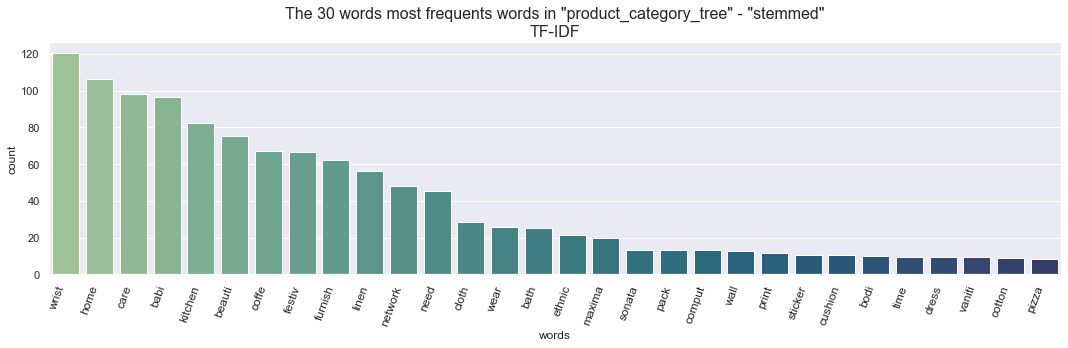

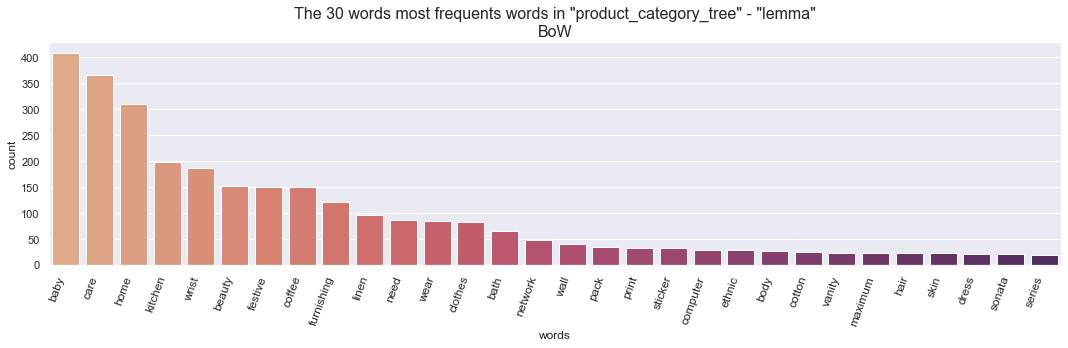

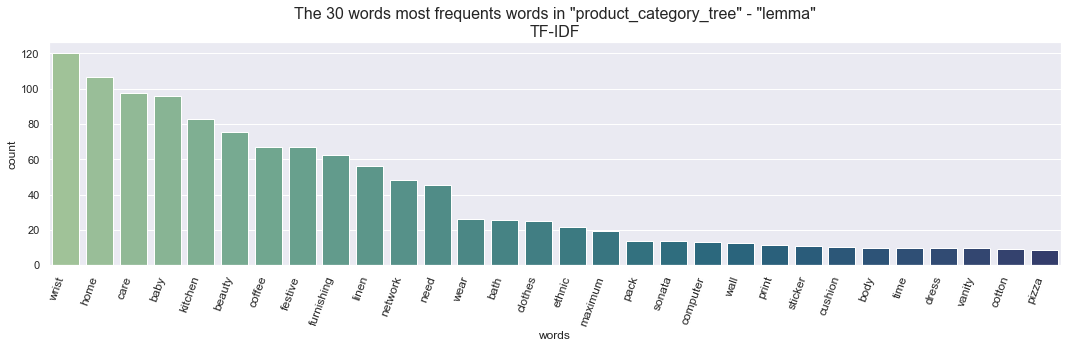

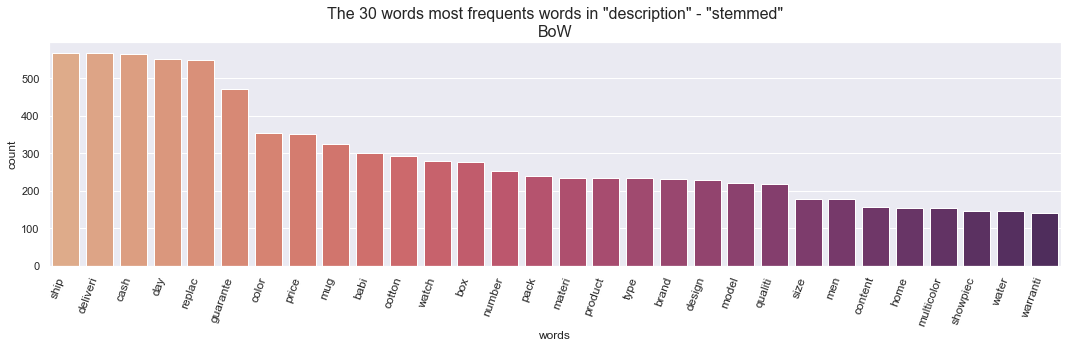

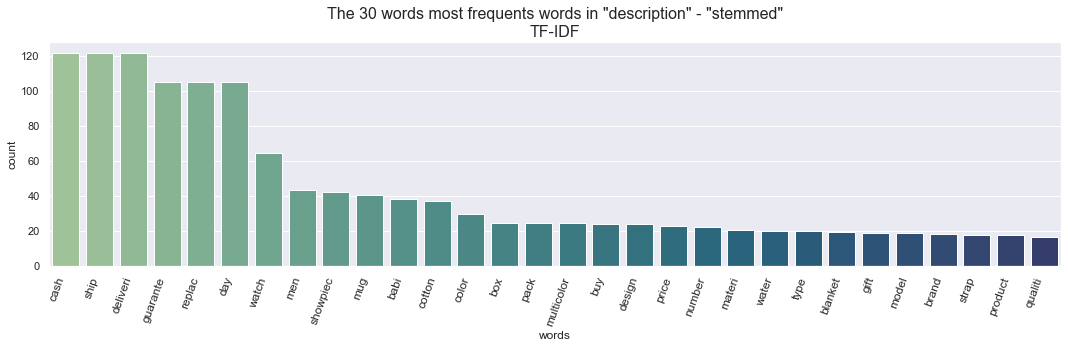

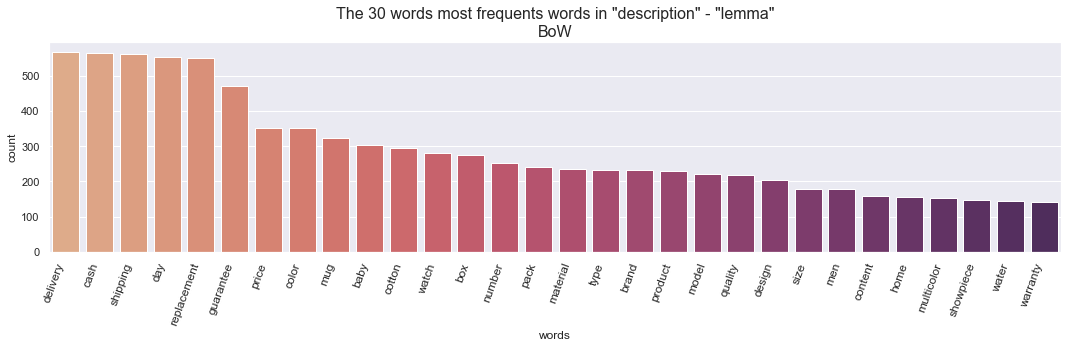

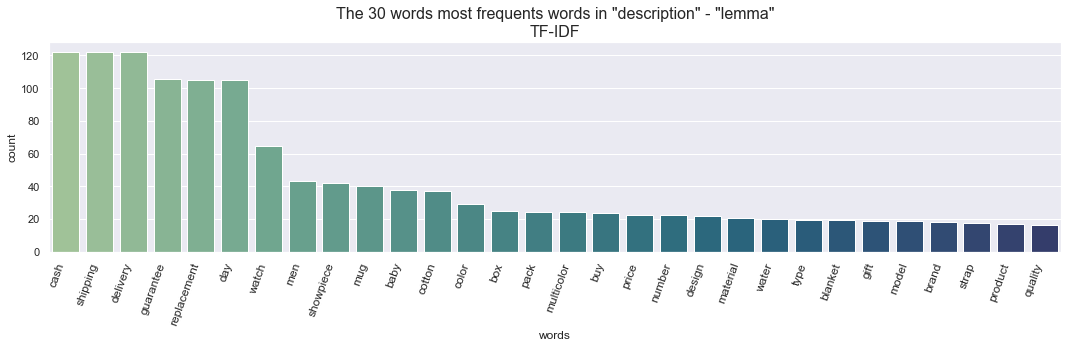

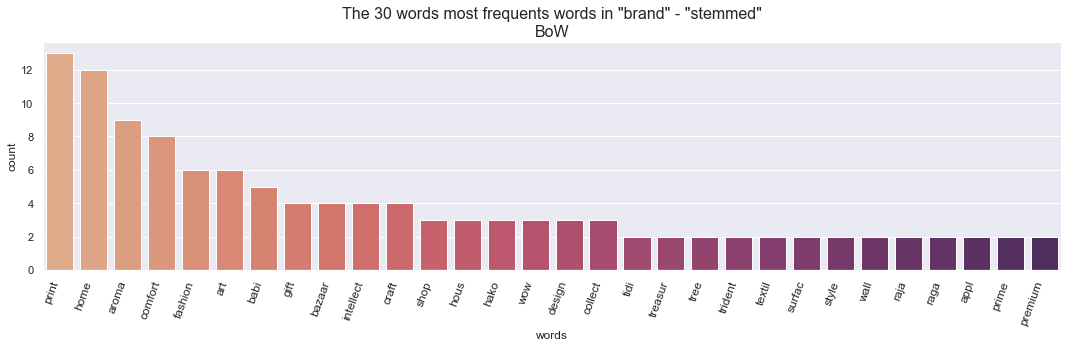

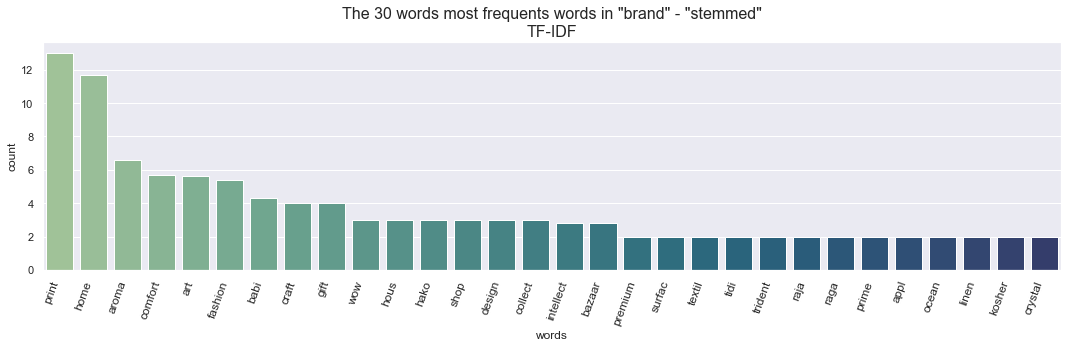

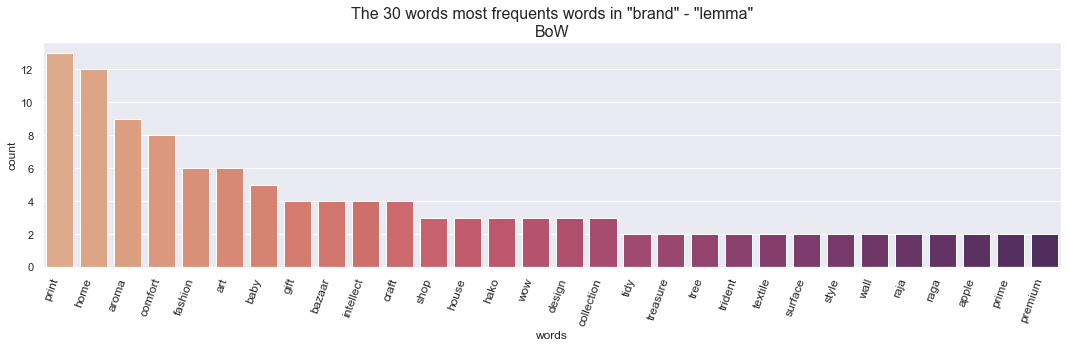

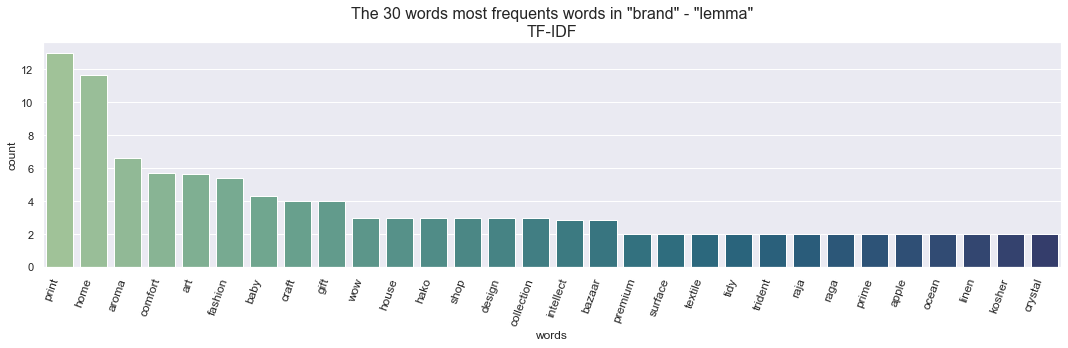

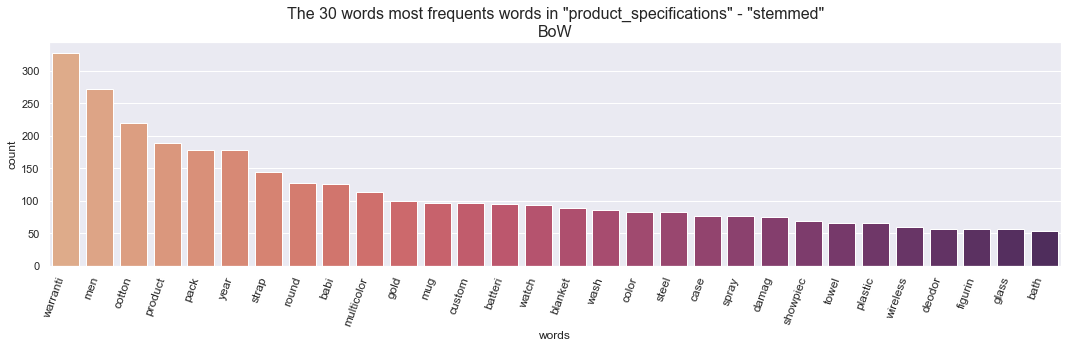

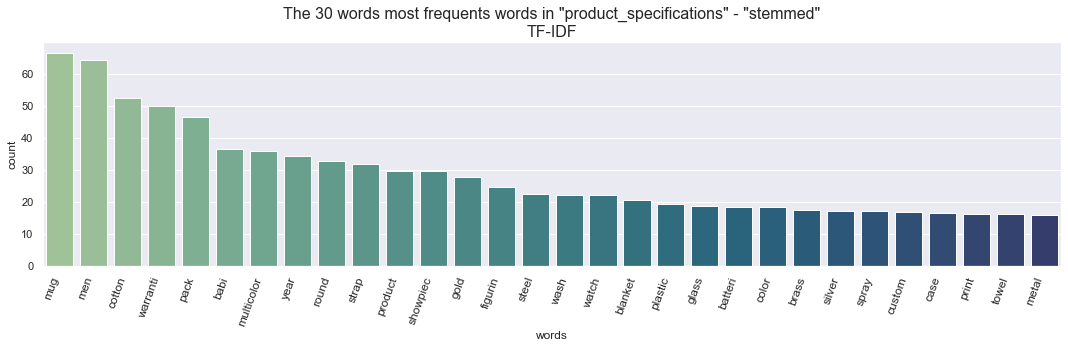

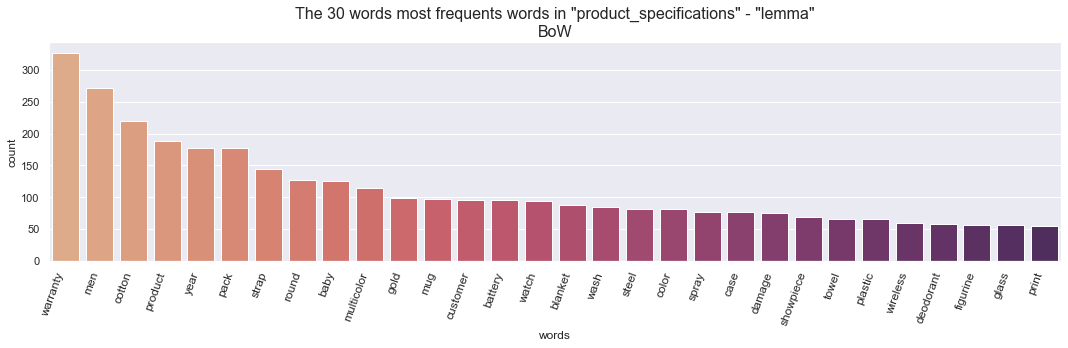

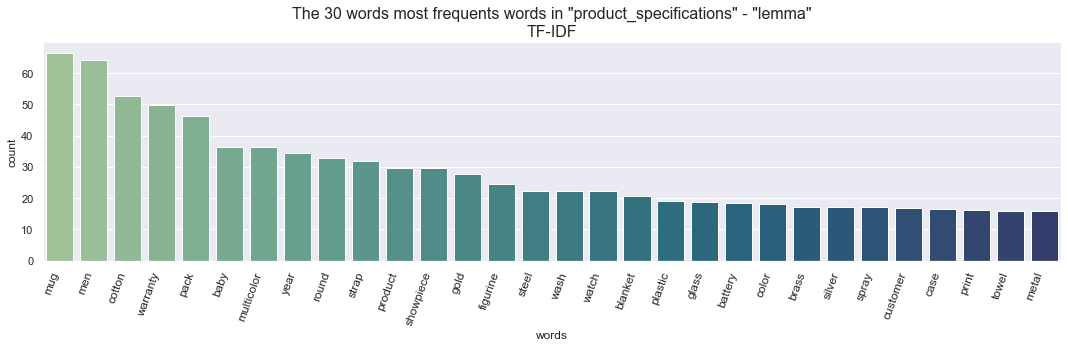

In [75]:
for col, value in text_columns.items():
    
    for var in ["stemmed", "lemma"]:
        
        for type_of_vector in ["bow", "tfidf"]:
            
            if type_of_vector == "bow":
                palette = "flare"
                temp = "BoW"
            else:
                palette = "crest"
                temp = "TF-IDF"
        
             # Plottint the results
            most_frequent_words = (globals()["df_" + type_of_vector + "_" + col + "_" + var].sum(axis=0)).sort_values(ascending=False).head(30)

            fig = plt.figure(figsize=(15, 5))
            plot = sns.barplot(x=most_frequent_words.index, y=most_frequent_words, palette=palette)
            plot.set_xticklabels(labels=most_frequent_words.index, rotation=70, size=12,
                                     horizontalalignment="right")
            plt.ylabel("count", size=12)
            plt.xlabel("words", size=12)
            plt.title("The 30 words most frequents words in \"" + col + "\" - \"" + var + "\"\n" + temp, size=16)
            plt.tight_layout()
            plt.show()
            
        print("\n\n")

<div style="background-color: #FF5733;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">--------- INFORMATION ---------</h1>
</div>

At this point, we have:
    - BoW / Lemma
    - BoW / Stemmed
    - TF-IDF / Lemma
    - TF-IDF / Stemmed

<div style="background-color: #FF5733;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">--------- INFORMATION ---------</h1>
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">6. Pre-processing Images</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.1. Analyzing images</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's take a look at some images before dealing with them</p>
</div>

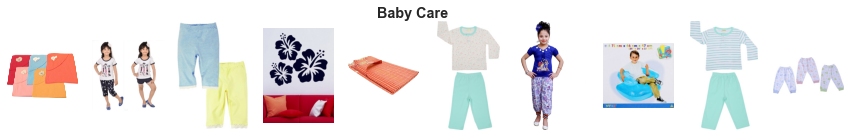

Image  Width  Height
0  c1e9b5875e442203073211c522072973.jpg   2044    1283
1  e40e9b4ae48e452dc407d299b467d0c3.jpg   1066    1064
2  9ec6285cc619688d787d641cb87c10d6.jpg    668    1000
3  b1644f47c7dfa58f8c06677f2a27ee09.jpg    900    1200
4  948699ab8c947ce56c256f9cf7996761.jpg   4584    2556
5  90e56526f4c5892beac49f262b85150a.jpg    610    1065
6  8f41c6931b5220c2bb34d1cab21cb220.jpg   1031    1740
7  b454f9f449c9dff58b90113ba984ea98.jpg    418     379
8  4d638f7a608a76db27cd7bab13582a93.jpg    660    1063
9  0991e8d8f884003ab18890971191085d.jpg    700     364

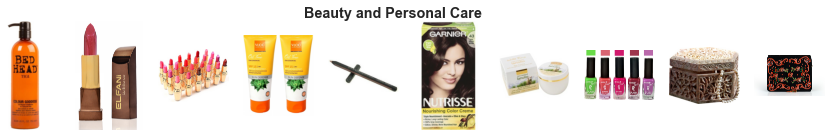

Image  Width  Height
0  4e09d5a71d46d61de3d4c9c5aedb73f2.jpg    329    1100
1  a618354ba17cff64826558d81afc77ab.jpg   1522    2434
2  cabeeb2c7f68a833964bf7329d360886.jpg   1100     826
3  91795f4b0e4aac27314477a91b63bfb7.jpg    833     954
4  4942e0a9c0527dc00319a39fc8f103e6.jpg   1100     510
5  17582ae953860b5320683768b8e97d3a.jpg    569    1100
6  a67d4b8df18ac476cd1b0bbd80e589a4.jpg    400     255
7  66a5a21ea332aefcc7b90dbad94053aa.jpg   1570    1109
8  1fb0fc88acf0dc6ab9528c26252447e6.jpg   1100     873
9  afc829d45be38102afaa20f4bce2f627.jpg   3139    1853

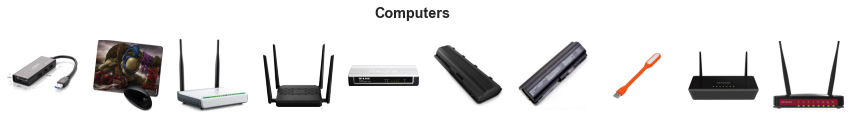

Image  Width  Height
0  95b0779b1a04ab70d62c72b53090c4b3.jpg   1100     626
1  db6c79a1d852944a89e157793f392d67.jpg   1097    1100
2  e365b55f806e5d0abe0094a9f2590e33.jpg    756     773
3  b4327c9879644be2a04e9b2df963f6cb.jpg   1100     968
4  ae19a81b730b48b87ca72521af8fb902.jpg   1280     374
5  9a8fa4fd6524ada03411b033a9daadc1.jpg    400     349
6  0d02f4703fde00645704e15bba23e77d.jpg    481     471
7  7cdc62f8d3f7ab8b9d2dddc14c86de83.jpg   1100    1100
8  215decf6f993d7b45d75520d9174493f.jpg   1100     758
9  2a20862f02555a44b0ab301bed987a0b.jpg    674     659

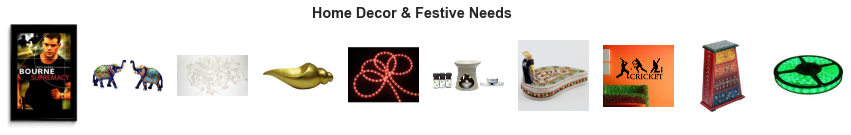

Image  Width  Height
0  e225be101bbad1ea9d031261ba4387b8.jpg    751    1100
1  c109187e7975ee8fdb2b3dfbdd9dce20.jpg   1100     503
2  6e6694c52c9273cde2163d34d5b44e94.jpg   4099    2386
3  edec3bb5df9c4bc618752e94532bb36e.jpg   1100     434
4  8b7a51c69b47f4714b5f7131077b5d30.jpg   1100     895
5  f0938b0d88eac91deee6d5add54097d3.jpg   2182     949
6  a12d9ae5720ae41446e084911f0c2865.jpg   1000    1000
7  2414e4b7e5948263b8dbb4843557be4d.jpg   2424    2115
8  198dbe7be6f84f6448197148d7b5e5a5.jpg   1086    1100
9  984983d05e18e63d1a314e86cb362ae5.jpg   1100     666

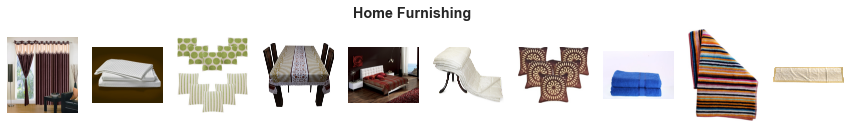

Image  Width  Height
0  678ebb5f6057dcc51948253c1b39b0b8.jpg   1093    1164
1  8ec6ee9814a27423e66c3c9ea26f77aa.jpg   1100     855
2  d218c32df572e82db50faecd62179db2.jpg   1031    1100
3  f2658bad8c2b7d5b08984c6ac34267f7.jpg   1460    1326
4  fc59187b2e011cf098ce420a0ee02e10.jpg   1181     929
5  14bc693d9b86c58696e5917045e9d4de.jpg   4131    3286
6  159b45e4dede207f28319bf1cacee3bc.jpg   1100     869
7  a30aa3b765b613c158fd3a295ed934fa.jpg   1100     733
8  72db37ec42ee76d79cf395221e0f4cce.jpg    852    1100
9  13596c5cc53a74268613e5c0b7d46b60.jpg   4952    1136

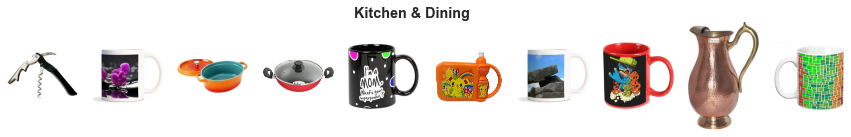

Image  Width  Height
0  06fdaa2b03d70da4358311d260456729.jpg   1100     728
1  7956d9586de3e25ff586bca58be7195e.jpg   1100     844
2  6ed4eb71c0707f1d6fdddcf62562cb02.jpg   1100     529
3  0e73201f6d8807776e1d21c969078289.jpg   2184     992
4  b7ef3e6ec248f17f3a6a4697120ddb96.jpg   1100    1018
5  5a7a1287fef0d986a5e237797beee286.jpg   3233    2357
6  acd2f21d63ac0bbed4d52e6010d9460b.jpg   1100     844
7  58d7fbbe6d306ecf16e0a7ac05b211d4.jpg   1100    1033
8  4b59516432fbc3d61e8e58d547fde431.jpg    760    1159
9  60efd61370e70267dc60b11ff2bf974c.jpg   1100    1048

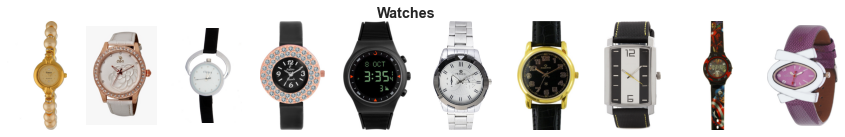

Image  Width  Height
0  75015382e469d36e397c5b47ea613314.jpg    653    1203
1  e24ef34ede03630207f0d367f633d8ea.jpg    419     587
2  a7bd63ef1d3b345d7f9a162865bb7c0d.jpg   1068    1440
3  009099b1f6e1e8f893ec29a7023153c4.jpg    687    1162
4  41384da51732c0b4df3de8f395714fbb.jpg    318     510
5  fc93a41f31c4e997fbfcc5bd0a63ee65.jpg   1029    1899
6  c7d81193e868b50355412ced7a67f8f3.jpg    490     871
7  3864ab10ef7006452fef45513de8f868.jpg    712    1360
8  788dc3a3da91c0f46a7c465e07f91dd4.jpg    358    1311
9  8aa19c1f26ee1f256d4c3ab5f2f849be.jpg    788    1127

In [76]:
n_rows, n_cols = 1, 10

# Grpuping data by category
df_groupby = df_data.groupby("category_1")

for category, sub_df in df_groupby:
    
    #  list to save images size
    image_name, height_size, width_size = [[] for i in range(3)]
    
    # Filtering random images by each category
    images_index_by_category = sub_df.sample(10).index
    
    # Initializing each figure/plot
    fig = plt.figure(figsize=(15, 2))
    plt.suptitle(category, fontweight="bold")
    
    for i, image_index in enumerate(images_index_by_category, 1):
        
        # Identifying an image
        image = df_data["image"].loc[image_index]
        image_name.append(image)
        
        # Reading the image attributes
        img = cv2.imread(ORIGINAL_IMAGES_PATH + image, cv2.IMREAD_UNCHANGED)
        height_size.append(img.shape[0])
        width_size.append(img.shape[1])
        
        # Reading a specific image based on index
        image = mpimg.imread(ORIGINAL_IMAGES_PATH + image)
        
        # Plotting imaga in one row based on category
        ax = fig.add_subplot(n_rows, n_cols, i)        
        ax.imshow(image)
        plt.axis("off")
        
    df_images = pd.DataFrame({
        "Image": image_name,
        "Width": width_size,
        "Height": height_size
    })
    
    plt.show()
    display(df_images)
    print("\n")


<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>At this point, we can conclude </p>
    <ul style="list-style-type: square;">
        <li>It seems that images are good categorized based on the 1º level of the tree of categories</li>
        <li>Most of images are a big size</li>
    </ul>  
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.2. Processing images</h3>
</div>

<div class="alert alert-block alert-info">
    <p>We are going to process images as follows:</p>
    <ol>
        <li>Size reduction</li>
        <li>Adjusting contrast and brightness</li>
        <li>Transform to gray</li>
        <li>Noise reduction</li>
    </ol>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.2.1. Size reduction</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Let's reduce images</p>
</div>

In [77]:
df_data["image"].apply(lambda x: thumbnail_image(x, basewidth=224, path=ORIGINAL_IMAGES_PATH))

0       None
1       None
2       None
3       None
4       None
        ... 
1045    None
1046    None
1047    None
1048    None
1049    None
Name: image, Length: 1050, dtype: object

<div class="alert alert-block alert-info">
    <p>Let's look at the results</p>
</div>

In [78]:
df_images[["new_width", "new_height"]] = df_images["Image"].apply(lambda x: image_size(x, ORIGINAL_IMAGES_PATH + "thumbnails/")).to_list()
df_images

Image  Width  Height  new_width  new_height
0  75015382e469d36e397c5b47ea613314.jpg    653    1203        121         224
1  e24ef34ede03630207f0d367f633d8ea.jpg    419     587        159         224
2  a7bd63ef1d3b345d7f9a162865bb7c0d.jpg   1068    1440        166         224
3  009099b1f6e1e8f893ec29a7023153c4.jpg    687    1162        132         224
4  41384da51732c0b4df3de8f395714fbb.jpg    318     510        139         224
5  fc93a41f31c4e997fbfcc5bd0a63ee65.jpg   1029    1899        121         224
6  c7d81193e868b50355412ced7a67f8f3.jpg    490     871        126         224
7  3864ab10ef7006452fef45513de8f868.jpg    712    1360        117         224
8  788dc3a3da91c0f46a7c465e07f91dd4.jpg    358    1311         61         224
9  8aa19c1f26ee1f256d4c3ab5f2f849be.jpg    788    1127        156         224

<div class="alert alert-block alert-success">
    <p>Now, we get the image reduced</p>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.2.2. Adjusting contrast and brightness</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Now, we are going to use the thumbnails created</p>
</div>

In [79]:
df_data["image"].apply(lambda x: contrast_and_brightness(x, path=THUMBNAILS_IMAGES_PATH))

0       None
1       None
2       None
3       None
4       None
        ... 
1045    None
1046    None
1047    None
1048    None
1049    None
Name: image, Length: 1050, dtype: object

<div class="alert alert-block alert-info">
    <p>Let's look at the results</p>
</div>

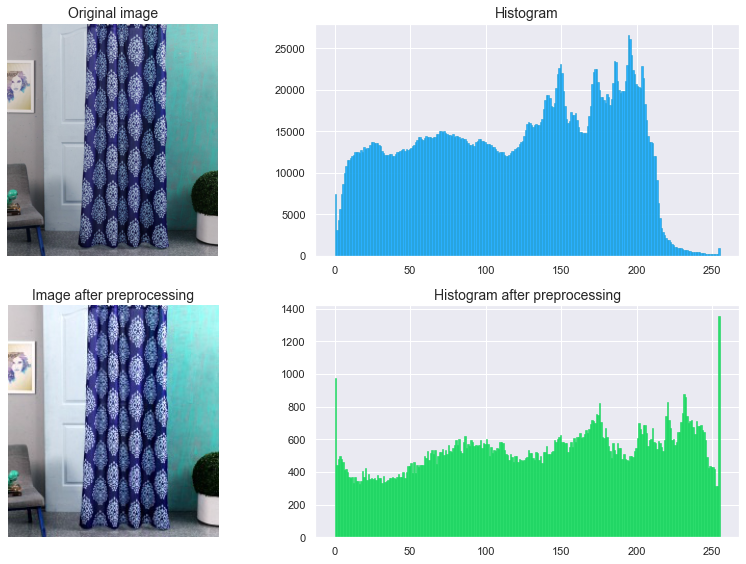

In [80]:
show_image_and_histogram("0ec47240feda42c63e42f1e9cee60f7a.jpg", 
                        ORIGINAL_IMAGES_PATH, CB_IMAGES_PATH)

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.2.3. Gray images</h4>
</div>

<div class="alert alert-block alert-info">
    <p>To transform images to gray escals, we are going to use the image with contrast and brightness modified</p>
</div>

In [81]:
df_data["image"].apply(lambda x: gray_image(x, CB_IMAGES_PATH))

0       None
1       None
2       None
3       None
4       None
        ... 
1045    None
1046    None
1047    None
1048    None
1049    None
Name: image, Length: 1050, dtype: object

<div class="alert alert-block alert-info">
    <p>Let's look at the results</p>
</div>

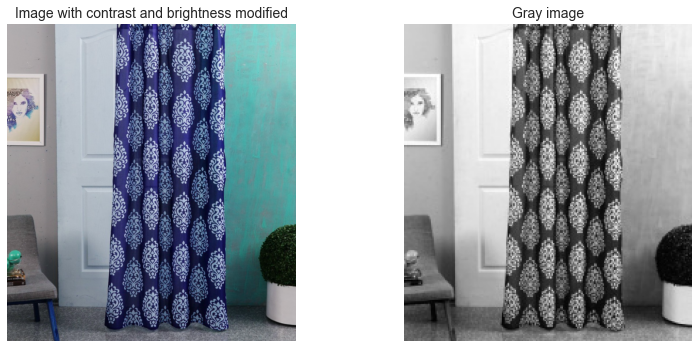

In [82]:
original_image = cv2.imread(ORIGINAL_IMAGES_PATH + "0ec47240feda42c63e42f1e9cee60f7a.jpg")
gray_image = cv2.imread(GRAY_IMAGES_PATH + "0ec47240feda42c63e42f1e9cee60f7a.jpg")

# Initializing each figure/plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5)) 

ax1.imshow(original_image)
ax1.set_title("Image with contrast and brightness modified", fontsize=14)
ax1.grid(None)
ax1.axis("off")

ax2.imshow(gray_image)
ax2.set_title("Gray image", fontsize=14)
ax2.grid(None)
ax2.axis("off")

plt.tight_layout()
plt.show()

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.2.4. Noise reduction</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Now, we are going to use the gray images</p>
</div>

In [83]:
df_data["image"].apply(lambda x: noise_reduction(x, GRAY_IMAGES_PATH))

0       None
1       None
2       None
3       None
4       None
        ... 
1045    None
1046    None
1047    None
1048    None
1049    None
Name: image, Length: 1050, dtype: object

<div class="alert alert-block alert-info">
    <p>Let's look at the results</p>
</div>

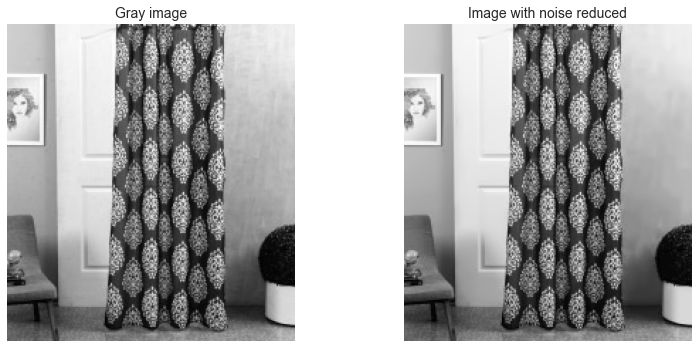

In [84]:
gray_image = cv2.imread(GRAY_IMAGES_PATH + "0ec47240feda42c63e42f1e9cee60f7a.jpg")
image_with_noise_reduced = cv2.imread(NR_IMAGES_PATH + "0ec47240feda42c63e42f1e9cee60f7a.jpg")

# Initializing each figure/plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5)) 

ax1.imshow(gray_image)
ax1.set_title("Gray image", fontsize=14)
ax1.grid(None)
ax1.axis("off")

ax2.imshow(image_with_noise_reduced)
ax2.set_title("Image with noise reduced", fontsize=14)
ax2.grid(None)
ax2.axis("off")

plt.tight_layout()
plt.show()

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.3. SIFT and ORB Visualizations</h3>
</div>

<div class="alert alert-block alert-info">
    <p>We are going to select two images in same category ("Watches") to see the algorithms on them</p>
</div>

In [85]:
image_a = cv2.imread(NR_IMAGES_PATH + "9924fba9b2a738e5a141995952e73104.jpg")
image_b = cv2.imread(NR_IMAGES_PATH + "29b1ca231e10d5269516b80bf9d0dffc.jpg")

<div class="alert alert-block alert-info">
    <p>Let's plot the images</p>
</div>

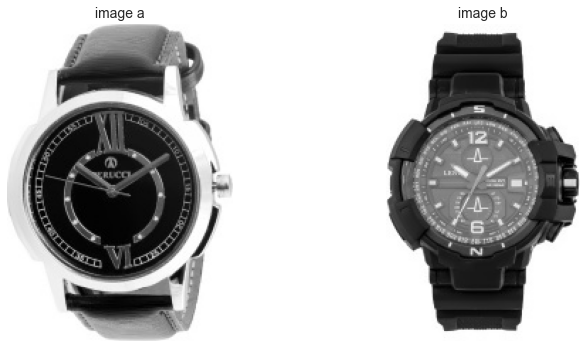

In [86]:
plot_two_images(image_a, image_b)

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.3.1. SIFT - Scale Invariant Feature Transformation </h4>
</div>

<div class="alert alert-block alert-info">
    <p>Let's detect key points and descriptors</p>
</div>

In [87]:
sift = cv2.SIFT_create()

key_points_a_sift, descriptors_a_sift = sift.detectAndCompute(image_a, None)
key_points_b_sift, descriptors_b_sift = sift.detectAndCompute(image_b, None)

image_a_key_points_sift = cv2.drawKeypoints(image_a, key_points_a_sift, None)
image_b_key_points_sift = cv2.drawKeypoints(image_b, key_points_b_sift, None)

<div class="alert alert-block alert-info">
    <p>Let's plot the images</p>
</div>

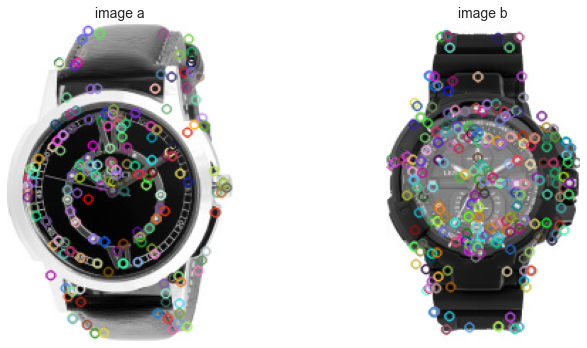

In [88]:
plot_two_images(image_a_key_points_sift, image_b_key_points_sift)

<div class="alert alert-block alert-info">
    <p>Let's match the images</p>
</div>

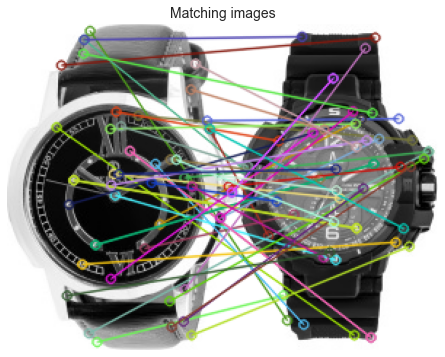

In [89]:
#feature matching
bf_macher_sift = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches_sift = bf_macher_sift.match(descriptors_a_sift, descriptors_b_sift)
matches_sift = sorted(matches_sift, key=lambda x: x.distance)
image_3_sift = cv2.drawMatches(image_a, key_points_a_sift, image_b, key_points_b_sift,
                               matches_sift[:50], None, flags=2)

plt.figure(figsize=(10, 6))
plt.imshow(image_3_sift)
plt.grid(None)
plt.axis("off")
plt.title("Matching images", fontsize=14)
plt.show()

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.3.2. ORB - Oriented Fast and Rotated BRIEF</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Let's detect key points and descriptors</p>
</div>

In [90]:
orb = cv2.ORB_create()

key_points_a_orb, descriptors_a_orb = orb.detectAndCompute(image_a, None)
key_points_b_orb, descriptors_b_orb = orb.detectAndCompute(image_b, None)

image_a_key_points_orb = cv2.drawKeypoints(image_a, key_points_a_orb, None)
image_b_key_points_orb = cv2.drawKeypoints(image_b, key_points_b_orb, None)

<div class="alert alert-block alert-info">
    <p>Let's plot the images</p>
</div>

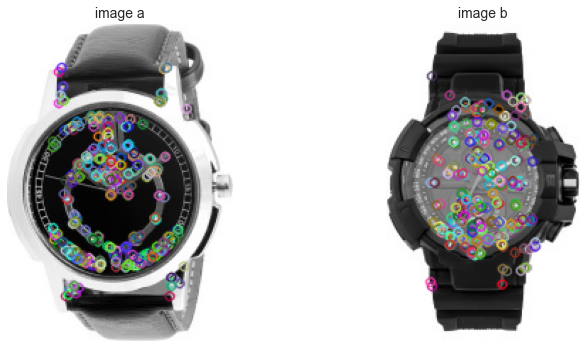

In [91]:
plot_two_images(image_a_key_points_orb, image_b_key_points_orb)

<div class="alert alert-block alert-info">
    <p>Let's match the images</p>
</div>

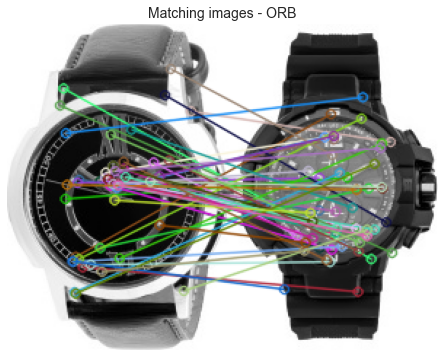

In [92]:
#feature matching
bf_macher_orb = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches_orb = bf_macher_orb.match(descriptors_a_orb, descriptors_b_orb)
matches_orb = sorted(matches_orb, key=lambda x: x.distance)
image_3_orb = cv2.drawMatches(image_a, key_points_a_orb, image_b, key_points_b_orb,
                              matches_orb[:50], None, flags=2)

plt.figure(figsize=(10, 6))
plt.imshow(image_3_orb)
plt.grid(None)
plt.axis("off")
plt.title("Matching images - ORB", fontsize=14)
plt.show()

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; font-size:16px;">6.3.3. Comparing SIFT / ORB</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Let's plot the images</p>
</div>

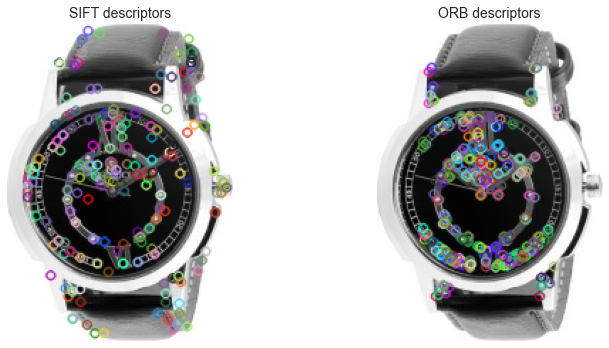

In [93]:
plot_two_images(image_a_key_points_sift, image_a_key_points_orb,
               title_a="SIFT descriptors", title_b="ORB descriptors")

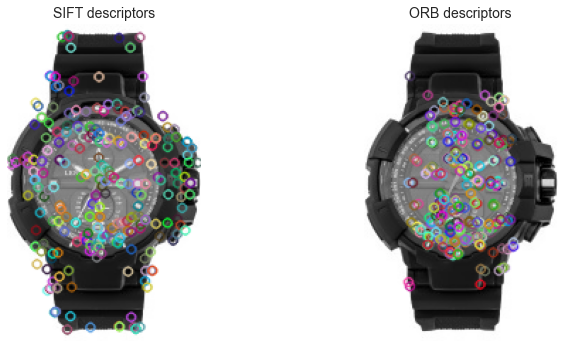

In [94]:
plot_two_images(image_b_key_points_sift, image_b_key_points_orb,
               title_a="SIFT descriptors", title_b="ORB descriptors")

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.4. SIFT Algorithme</h3>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.4.1. Features detection by image</h4>
</div>

<div class="alert alert-block alert-info">
    <p>We are going to detect the images descriptors through SIFT</p>
</div>

In [95]:
sift = cv2.SIFT_create()

In [96]:
sift_desc_by_image, sift_desc_all = get_descriptors(df_data["image"],
                                                    NR_IMAGES_PATH,
                                                    sift)

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.4.1. Clustering to build images features</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Now, we are going to use MiniBatchKMeans to build image features</p>
    <p>Determination number of clusters and batch size<br># of cluster is fixed as sqrt of # descriptors</p>
</div>

In [97]:
k = int(round(np.sqrt(len(sift_desc_all)), 0))
batch_size = df_data["image"].shape[0] * 3

print("Number of clusters:", k)
print("Batch size:", batch_size)

Number of clusters: 546
Batch size: 3150


<div class="alert alert-block alert-info">
    <p>Initialize the clusterer with n_clusters=k value and a random generator seed of 10 for reproducibility.</p>
</div>

In [98]:
sift_kmeans = MiniBatchKMeans(n_clusters=k, init="k-means++", max_iter=1000,
                              batch_size=batch_size, random_state=10, init_size=3*k)
sift_kmeans.fit(sift_desc_all)

MiniBatchKMeans(batch_size=3150, init_size=1638, max_iter=1000, n_clusters=546,
                random_state=10)

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.4.2. Creation of image features</h4>
</div>

In [105]:
sift_img_features = build_features(sift_kmeans, sift_desc_by_image)

0
100
200
300
400
500
600
700
800
900
1000


In [107]:
df_sift_img_features = pd.DataFrame(sift_img_features)
df_sift_img_features.head()

0         1         2         3         4         5         6    \
0  0.006928  0.000000  0.000000  0.004619  0.000000  0.000000  0.000000   
1  0.000000  0.003781  0.005671  0.001890  0.001890  0.000000  0.000000   
2  0.005472  0.000000  0.000000  0.016416  0.000000  0.000000  0.000000   
3  0.000000  0.000000  0.003831  0.002554  0.011494  0.001277  0.000000   
4  0.000000  0.001866  0.033582  0.000000  0.003731  0.007463  0.003731   

        7         8         9         10        11   ...  534       535  \
0  0.000000  0.000000  0.004619  0.000000  0.000000  ...  0.0  0.004619   
1  0.000000  0.000000  0.000000  0.000000  0.001890  ...  0.0  0.001890   
2  0.005472  0.000000  0.017784  0.000000  0.000000  ...  0.0  0.000000   
3  0.000000  0.007663  0.000000  0.000000  0.001277  ...  0.0  0.000000   
4  0.000000  0.000000  0.000000  0.003731  0.000000  ...  0.0  0.001866   

        536       537       538       539       540  541       542       543  \
0  0.000000  0.000000  0.000000  0.000000  0.002309  0.0  0.000000  0.002309   
1  0.000000  0.000000  0.000000  0.007561  0.000000  0.0  0.000000  0.000000   
2  0.000000  0.008208  0.000000  0.002736  0.000000  0.0  0.000000  0.000000   
3  0.002554  0.000000  0.001277  0.000000  0.000000  0.0  0.006386  0.000000   
4  0.000000  0.000000  0.000000  0.001866  0.000000  0.0  0.000000  0.000000   

        544       545  
0  0.000000  0.000000  
1  0.003781  0.000000  
2  0.000000  0.001368  
3  0.000000  0.000000  
4  0.001866  0.000000  

[5 rows x 546 columns]

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.4.3. PCA dimension reduction</h4>
</div>

<div class="alert alert-block alert-info">
    <p>We are going to reduce the features dimension through PCA, keeping a high level of explained variance</p>
    <p>But first, let's identify the minimum and maximun value in the dataset.</p>
</div>

In [123]:
print("The minimun value is: ", df_sift_img_features.apply(np.min).min())
print("The maximun value is: ", df_sift_img_features.apply(np.max).max())

The minimun value is:  0.0
The maximun value is:  0.5888888888888888


<div class="alert alert-block alert-success">
    <p>All data is in the same range and the minimun and maximun value are between 0 and 0.58 respectively<br>So, we don't need to treat the data through some preprocessing as StandarScaler or something like that.</p>
</div>

In [127]:
from sklearn.decomposition import PCA

In [177]:
print("Dataset dimensions before PCA reduction: ", df_sift_img_features.shape)

pca_sift = PCA(n_components=0.98)
df_sift_img_features_pca = pca_sift.fit_transform(df_sift_img_features)

print("Dataset dimensions after PCA reduction: ", df_sift_img_features_pca.shape)

Dataset dimensions before PCA reduction:  (1050, 546)
Dataset dimensions after PCA reduction:  (1050, 385)


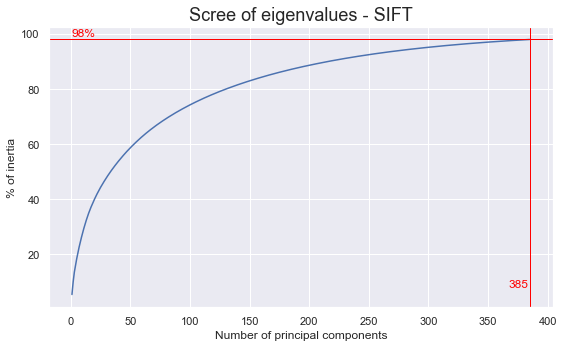

In [179]:
# Scree plot
scree = pca_sift.explained_variance_ratio_*100

fig = plt.subplots(figsize=(8, 5))
plt.plot(np.arange(len(scree))+1, scree.cumsum())

plt.xlabel("Number of principal components", size=12)
plt.ylabel("% of inertia", size=12)

plt.axhline(98, lw=1, c="red")
plt.text(1, 99, "98%", c="red")
plt.axvline(385, lw=1, c="red")
plt.text(367, 8, "385", c="red")

plt.title("Scree of eigenvalues - SIFT", size=18)
plt.tight_layout()
plt.show()

<div style="background-color: #FF5733;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">--------- FLAG POSITION ---------</h1>
</div>

In [100]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

C:\Users\Samir\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


<div style="background-color: #FF5733;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">--------- FLAG POSITION ---------</h1>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.5. ORB Algorithme</h3>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.5.1. Features detection by image</h4>
</div>

<div class="alert alert-block alert-info">
    <p>We are going to detect the images descriptors through SIFT</p>
</div>

In [180]:
orb = cv2.ORB_create()

In [182]:
orb_desc_by_image, orb_desc_all = get_descriptors(df_data["image"],
                                                    NR_IMAGES_PATH,
                                                    orb)

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.5.1. Clustering to build images features</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Now, we are going to use MiniBatchKMeans to build image features</p>
    <p>Determination number of clusters and batch size<br># of cluster is fixed as sqrt of # descriptors</p>
</div>

In [184]:
k = int(round(np.sqrt(len(orb_desc_all)), 0))
batch_size = df_data["image"].shape[0] * 3

print("Number of clusters:", k)
print("Batch size:", batch_size)

Number of clusters: 567
Batch size: 3150


<div class="alert alert-block alert-info">
    <p>Initialize the clusterer with n_clusters=k value and a random generator seed of 10 for reproducibility.</p>
</div>

In [185]:
orb_kmeans = MiniBatchKMeans(n_clusters=k, init="k-means++", max_iter=1000,
                              batch_size=batch_size, random_state=10, init_size=3*k)
orb_kmeans.fit(orb_desc_all)

MiniBatchKMeans(batch_size=3150, init_size=1701, max_iter=1000, n_clusters=567,
                random_state=10)

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.5.2. Creation of image features</h4>
</div>

In [186]:
orb_img_features = build_features(orb_kmeans, orb_desc_by_image)

0
100
200
300
400
500
600
700
800
900
1000


In [187]:
df_orb_img_features = pd.DataFrame(orb_img_features)
df_orb_img_features.head()

0         1         2    3         4         5         6         7    \
0  0.000000  0.000000  0.000000  0.0  0.002488  0.000000  0.000000  0.000000   
1  0.005236  0.000000  0.000000  0.0  0.002618  0.005236  0.002618  0.005236   
2  0.011287  0.002257  0.004515  0.0  0.004515  0.000000  0.004515  0.004515   
3  0.000000  0.000000  0.002304  0.0  0.002304  0.000000  0.000000  0.000000   
4  0.006944  0.004630  0.000000  0.0  0.000000  0.000000  0.000000  0.000000   

        8         9         10        11   ...       555       556       557  \
0  0.000000  0.017413  0.002488  0.000000  ...  0.000000  0.000000  0.000000   
1  0.007853  0.002618  0.000000  0.005236  ...  0.000000  0.010471  0.000000   
2  0.000000  0.000000  0.002257  0.002257  ...  0.004515  0.002257  0.002257   
3  0.002304  0.004608  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
4  0.002315  0.000000  0.000000  0.004630  ...  0.000000  0.006944  0.002315   

        558       559       560       561       562       563       564  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.010471  0.007853  0.000000  0.002618  0.000000   
2  0.002257  0.002257  0.002257  0.000000  0.004515  0.000000  0.004515   
3  0.000000  0.004608  0.002304  0.002304  0.000000  0.000000  0.004608   
4  0.004630  0.004630  0.002315  0.000000  0.000000  0.002315  0.000000   

        565       566  
0  0.002488  0.000000  
1  0.000000  0.000000  
2  0.000000  0.004515  
3  0.002304  0.000000  
4  0.002315  0.000000  

[5 rows x 567 columns]

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.5.3. PCA dimension reduction</h4>
</div>

<div class="alert alert-block alert-info">
    <p>We are going to reduce the features dimension through PCA, keeping a high level of explained variance</p>
    <p>But first, let's identify the minimum and maximun value in the dataset.</p>
</div>

In [188]:
print("The minimun value is: ", df_orb_img_features.apply(np.min).min())
print("The maximun value is: ", df_orb_img_features.apply(np.max).max())

The minimun value is:  0.0
The maximun value is:  1.0


<div class="alert alert-block alert-success">
    <p>All data is in the same range and the minimun and maximun value are between 0 and 0.58 respectively<br>So, we don't need to treat the data through some preprocessing as StandarScaler or something like that.</p>
</div>

In [127]:
from sklearn.decomposition import PCA

In [189]:
print("Dataset dimensions before PCA reduction: ", df_orb_img_features.shape)

pca_orb = PCA(n_components=0.98)
df_orb_img_features_pca = pca_orb.fit_transform(df_orb_img_features)

print("Dataset dimensions after PCA reduction: ", df_orb_img_features_pca.shape)

Dataset dimensions before PCA reduction:  (1036, 567)
Dataset dimensions after PCA reduction:  (1036, 398)


In [192]:
df_orb_img_features_pca.shape[1]

398

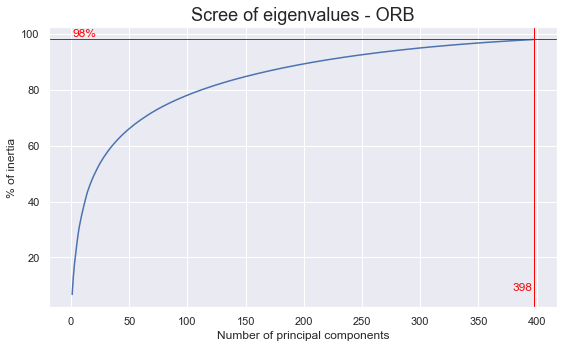

In [198]:
# Scree plot
scree = pca_orb.explained_variance_ratio_*100

fig = plt.subplots(figsize=(8, 5))
plt.plot(np.arange(len(scree))+1, scree.cumsum())

plt.xlabel("Number of principal components", size=12)
plt.ylabel("% of inertia", size=12)

plt.axhline(98, lw=1, c="red")
plt.text(1, 99, "98%", c="red")
plt.axvline(df_orb_img_features_pca.shape[1], lw=1, c="red")
plt.text(379, 8, df_orb_img_features_pca.shape[1], c="red")

plt.title("Scree of eigenvalues - ORB", size=18)
plt.tight_layout()
plt.show()